# Increasing Educational Attainment Through Federal Pell Grant Funding

   This capstone project analyzes the relationship between Pell Grant funding and college graduation rates, with the goal of identifying strategies to reduce economic inequality. Specifically, the project investigates whether increasing the average Pell Grant award per student will result in higher graduation rates.
   
   
   This report uses data from the Integrated Postsecondary Education Data System (IPEDS) and The Pell Partnership to investigate the relationship between Pell Grant funding and graduation rates using logistic regression, linear regression, and decision tree models. 

# Table of Contents

1. [Setup](#1.-Setup)   
  1.1 [Import Data](#1.1-Import-Data)
   
   
2. [Data Cleaning](#2.-Data-Cleaning)   
  2.1 [Convert Data Types](#2.1-Convert-Data-Types)     
  2.2 [Reformat Columns](#2.2-Reformat-Columns)
  
  
3. [Exploratory Data Analysis](#3.-Exploratory-Data-Analysis)  
  3.1 [Maps](#3.1-Maps)
  
  
4. [Model Preperation](#4.-Model-Preperation)   
  4.1 [Data Binning](#4.1-Data-Binning)     
  4.2 [Split Data](#4.2-Split-Data)        
  
  
5. [Logistic Regression Models](#5.-Logistic-Regression-Models)   
  5.1 [Unbalanced Logistic Regression Model](#5.1-Unbalanced-Logistic-Regression-Model)     
  5.2 [Balanced Logistic Regression Model](#5.2-Balanced-Logistic-Regression-Model)  
  5.2.1 [Balance the Training Set Using the SMOTE Technique](#5.2.1-Balance-the-Training-Set-Using-the-SMOTE-Technique)   
  5.2.2 [Fit the Balanced Logistic Regression Model](#5.2.2-Fit-the-Balanced-Logistic-Regression-Model)   
  5.3 [Balanced Linear Regression Model](#5.3-Balanced-Linear-Regression-Model)   


6. [Decision Tree Models](#6.-Decision-Tree-Models)   
  6.1 [Balanced Decision Tree Model](#6.1-Balanced-Decision-Tree-Model)     
  6.2 [Unbalanced Decision Tree Model](#6.2-Unbalanced-Decision-Tree-Model)     


7. [Linear Regression Models](#7.-Linear-Regression-Models)    
  7.1 [Linear Model Predicting Graduation Rates](#7.1-Linear-Model-Predicting-Graduation-Rates)    
  7.2 [Linear Model Predicting Admission Rates](#7.2-Linear-Model-Predicting-Admission-Rates)




# 1. Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
import imgkit

In [2]:
# Render our plots inline
%matplotlib inline
# Make the graphs a bit prettier, and bigger
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 7)

## 1.1 Import Data

In [3]:
ThePellPartnership = pd.read_csv('ThePellPartnership_EdTrust_NEW.csv', header=0)
ThePellPartnership.head()

unitid  admssn   applcn                                 Institution  State  \
0  441937  3304.0   5745.0  California State University-Channel Islands    CA   
1  433660  6246.0   9199.0                Florida Gulf Coast University    FL   
2  409698  5364.0  10263.0     California State University-Monterey Bay    CA   
3  366711  4055.0   9937.0       California State University-San Marcos    CA   
4  262129   715.0   1272.0                       New College of Florida    FL   

   Sector  Minority-Serving Institution  Number of Undergraduates  \
0  Public  Hispanic-Serving-Institution                    4736.0   
1  Public                            No                   12230.0   
2  Public  Hispanic-Serving-Institution                    5185.0   
3  Public  Hispanic-Serving-Institution                    9929.0   
4  Public                            No                     832.0   

   Percent Pell Recipients Among Undergraduates  \
0                                          39.6   
1                                          34.7   
2                                          47.6   
3                                          43.1   
4                                          28.6   

   Percent Underrepresented Minorities Among Total Undergraduates  ...  \
0                                               38.7               ...   
1                                               24.9               ...   
2                                               44.2               ...   
3                                               35.7               ...   
4                                               15.7               ...   

   2013 6-Year Pell Grant Recipient Graduation Rate  \
0                                              47.6   
1                                              45.0   
2                                              41.4   
3                                              40.7   
4                                              65.5   

   2013 6-Year Non-Pell Grant Recipient Graduation Rate  \
0                                               52.8      
1                                               44.0      
2                                               36.9      
3                                               49.9      
4                                               65.9      

   6-Year Graduation Rate Gap Between Pell and Non-Pell Students  \
0                                                5.2               
1                                                0.0               
2                                                0.0               
3                                                9.2               
4                                                0.4               

   Average 6-Year Pell Grant Recipient Graduation Rate among Peers  \
0                                               37.0                 
1                                               46.8                 
2                                               37.1                 
3                                               36.8                 
4                                               76.0                 

   Median 6-Year Pell Grant Recipient Graduation Rate Among Peers  \
0                                               36.5                
1                                               47.9                
2                                               40.0                
3                                               38.9                
4                                               81.3                

   Number of Peers with Pell Grad Rate Data  \
0                                      12.0   
1                                      14.0   
2                                      14.0   
3                                      15.0   
4                                      13.0   

   Pell Grant Recipient Graduation Rate Peer Group Rank  admssn_rate  \
0                                                3.0           

# 2. Data Cleaning

In [4]:
ThePellPartnership.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877 entries, 0 to 876
Data columns (total 22 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   unitid                                                           877 non-null    int64  
 1   admssn                                                           877 non-null    float64
 2   applcn                                                           877 non-null    float64
 3   Institution                                                      877 non-null    object 
 4   State                                                            877 non-null    object 
 5   Sector                                                           877 non-null    object 
 6   Minority-Serving Institution                                     877 non-null    object 
 7   Number of Undergraduates                    

In [5]:
ThePellPartnership.describe()

unitid        admssn        applcn  Number of Undergraduates  \
count     877.000000    877.000000    877.000000                877.000000   
mean   181154.395667   3968.841505   7055.822121               6805.358039   
std     41313.343212   4203.066034   8209.307902               7517.994493   
min    100663.000000    135.000000    171.000000                294.000000   
25%    151333.000000   1330.000000   2101.000000               1936.000000   
50%    181446.000000   2388.000000   4142.000000               3568.000000   
75%    213613.000000   4648.000000   8325.000000               8746.000000   
max    441937.000000  27861.000000  54871.000000              51010.000000   

       Percent Pell Recipients Among Undergraduates  \
count                                    877.000000   
mean                                      32.780274   
std                                       13.180343   
min                                        9.100000   
25%                                       22.700000   
50%                                       31.800000   
75%                                       40.500000   
max                                       89.800000   

       Percent Underrepresented Minorities Among Total Undergraduates  \
count                                         877.000000                
mean                                           19.903649                
std                                            17.733608                
min                                             0.800000                
25%                                             9.300000                
50%                                            14.200000                
75%                                            24.300000                
max                                            96.300000                

       Net Price for Low-Income Students-($0-30K)  \
count                                  877.000000   
mean                                 14180.664766   
std                                   5547.511724   
min                                   1144.000000   
25%                                   9838.000000   
50%                                  13791.000000   
75%                                  17870.000000   
max                                  33048.000000   

       Total Pell Dollars Received, 2012-13  \
count                          8.770000e+02   
mean                           9.622475e+06   
std                            1.156895e+07   
min                            3.664170e+05   
25%                            2.166551e+06   
50%                            4.844622e+06   
75%                            1.279718e+07   
max                            8.196921e+07   

       2013 6-Year Pell Grant Recipient Graduation Rate  \
count                                        877.000000   
mean                                          54.297605   
std                                           18.426384   
min                                           11.800000   
25%                                           40.500000   
50%                                           53.000000   
75%                                           67.600000   
max                                          100.000000   

       2013 6-Year Non-Pell Grant Recipient Graduation Rate  \
count                                         877.000000      
mean                                           60.410262      
std                                            16.824555      
min                                            14.000000      
25%                                            48.400000      
50%                                            60.600000      
75%                                            72.200000      
max                                            96.900000      

       6-Year Graduation Rate Gap Between Pell and Non-Pell Students  \
count                                         877.000000               
mean       

In [6]:
def Data_information(data):
    """
    A function to show the basic information the data set 
    input = data frame
    return information data frame
    """
    
    count = data.count()
    unique = data.nunique()
    duplicated = count - unique
    missing = data.isnull().sum()
    missingPCT = (missing / (count + missing)) * 100
    typedt = data.dtypes

    column_info_dict = {  "Non-Nulls": count, 'Missing Values':missing ,'Missing Percent':missingPCT,
                        "Unique Vales": unique , 'Duplicated':duplicated ,'Column Type':typedt}
    data_information = pd.DataFrame(column_info_dict).style.background_gradient(cmap='RdYlGn_r')
    return data_information

Data_information(ThePellPartnership)

In [7]:
ThePellPartnership = ThePellPartnership.drop(['Pell Grant Recipient Graduation Rate Peer Group Rank'], axis=1)

In [8]:
Data_information(ThePellPartnership)

In [9]:
ThePellPartnership['Sector'].value_counts()

Private Nonprofit    503
Public               374
Name: Sector, dtype: int64

In [10]:
ThePellPartnership = ThePellPartnership.dropna()
ThePellPartnership = ThePellPartnership.reset_index()
#ThePellPartnership = ThePellPartnership.reset_index(inplace = True)

In [11]:
ThePellPartnership['Sector'].value_counts()

Private Nonprofit    503
Public               374
Name: Sector, dtype: int64

In [12]:
ThePellPartnership

index  unitid   admssn   applcn  \
0        0  441937   3304.0   5745.0   
1        1  433660   6246.0   9199.0   
2        2  409698   5364.0  10263.0   
3        3  366711   4055.0   9937.0   
4        4  262129    715.0   1272.0   
..     ...     ...      ...      ...   
872    872  230959   1375.0   7984.0   
873    873  126562   3235.0   5413.0   
874    874  137351  11107.0  29194.0   
875    875  210304    667.0   1090.0   
876    876  212197   2411.0   3665.0   

                                    Institution  State             Sector  \
0    California State University-Channel Islands    CA             Public   
1                  Florida Gulf Coast University    FL             Public   
2       California State University-Monterey Bay    CA             Public   
3         California State University-San Marcos    CA             Public   
4                         New College of Florida    FL             Public   
..                                           ...   ...                ...   
872                           Middlebury College    VT  Private Nonprofit   
873                University of Colorado Denver    CO             Public   
874                  University of South Florida    FL             Public   
875                       Warner Pacific College    OR  Private Nonprofit   
876                        Elizabethtown College    PA  Private Nonprofit   

     Minority-Serving Institution  Number of Undergraduates  \
0    Hispanic-Serving-Institution                    4736.0   
1                              No                   12230.0   
2    Hispanic-Serving-Institution                    5185.0   
3    Hispanic-Serving-Institution                    9929.0   
4                              No                     832.0   
..                            ...                       ...   
872                            No                    2516.0   
873                            No                   13103.0   
874                            No                   31125.0   
875                            No                     551.0   
876                            No                    1885.0   

     Percent Pell Recipients Among Undergraduates  ...  \
0                                            39.6  ...   
1                                            34.7  ...   
2                                            47.6  ...   
3                                            43.1  ...   
4                                            28.6  ...   
..                                            ...  ...   
872                                          11.0  ...   
873                                          27.8  ...   
874                                          41.3  ...   
875                                          53.4  ...   
876                                          21.8  ...   

     Total Pell Dollars Received, 2012-13  \
0                               8531522.0   
1                              17619384.0   
2                              11748041.0   
3                              18153065.0   
4                               1060041.0   
..                                    ...   
872                             1279762.0   
873                            14829461.0   
874                            65008116.0   
875                             4140336.0   
876                             2112120.0   

     2013 6-Year Pell Grant Recipient Graduation Rate  \
0                                                47.6   
1                                                45.0   
2                                                41.4   
3                                                40.7   
4                                                65.5   
..                                                ...   
872                                              88.7   
873                                              41.2   
874                                              61.5   
875                               

## 2.1 Convert Data Types

In [13]:
ThePellPartnership['Number of Undergraduates'] = ThePellPartnership['Number of Undergraduates'].astype('int64')
ThePellPartnership['Percent Pell Recipients Among Undergraduates'] = ThePellPartnership['Percent Pell Recipients Among Undergraduates'].astype('float64')
ThePellPartnership['Percent Underrepresented Minorities Among Total Undergraduates'] = ThePellPartnership['Percent Underrepresented Minorities Among Total Undergraduates'].astype('float64')
ThePellPartnership['Net Price for Low-Income Students-($0-30K)'] = ThePellPartnership['Net Price for Low-Income Students-($0-30K)'].astype('int64')
ThePellPartnership['Total Pell Dollars Received, 2012-13'] = ThePellPartnership['Total Pell Dollars Received, 2012-13'].astype('int64')
ThePellPartnership['2013 6-Year Pell Grant Recipient Graduation Rate'] = ThePellPartnership['2013 6-Year Pell Grant Recipient Graduation Rate'].astype('float64')
ThePellPartnership['2013 6-Year Non-Pell Grant Recipient Graduation Rate'] = ThePellPartnership['2013 6-Year Non-Pell Grant Recipient Graduation Rate'].astype('float64')
ThePellPartnership['6-Year Graduation Rate Gap Between Pell and Non-Pell Students'] = ThePellPartnership['6-Year Graduation Rate Gap Between Pell and Non-Pell Students'].astype('float64')

In [14]:
Data_information(ThePellPartnership)

## 2.2 Reformat Columns

- Make all column names are lowwer case
- Remove spaces
- Remove - , space inbetween , start and ending space.
- Replace - with _

In [15]:
# A function to remove a specified list of characters from a list of strings and replace them with underscore

def remove_special_char(col_names : str , char_set : list):
    new_col_names=[]
    for col in col_names:
        for ch in char_set:
            if ch == '\\' or ch == '-' or ch == '/' or ch == ' ':
                col = col.replace(ch , '_')
            elif ch in col:
                col = col.replace(ch ,'')
            col = col
        new_col_names.append(col)
    return new_col_names

In [16]:
# Test the remove_special_char() function
remove_special_char(["a/b c" , "a-b"] , ['-','/' , ' '])

['a_b_c', 'a_b']

In [17]:
headers = remove_special_char(ThePellPartnership , ['-' ,' ', '/'])

In [18]:
ThePellPartnership.columns

Index(['index', 'unitid', 'admssn', 'applcn', 'Institution ', 'State',
       'Sector', 'Minority-Serving Institution', 'Number of Undergraduates',
       'Percent Pell Recipients Among Undergraduates',
       'Percent Underrepresented Minorities Among Total Undergraduates',
       'Net Price for Low-Income Students-($0-30K)',
       'Total Pell Dollars Received, 2012-13',
       '2013 6-Year Pell Grant Recipient Graduation Rate',
       '2013 6-Year Non-Pell Grant Recipient Graduation Rate',
       '6-Year Graduation Rate Gap Between Pell and Non-Pell Students',
       'Average 6-Year Pell Grant Recipient Graduation Rate among Peers',
       'Median 6-Year Pell Grant Recipient Graduation Rate Among Peers',
       'Number of Peers with Pell Grad Rate Data', 'admssn_rate',
       'Number of Undergraduates Recieving Pell Grants',
       'avg_pell_grant_per_student'],
      dtype='object')

In [19]:
ThePellPartnership.columns = headers
ThePellPartnership.columns

Index(['index', 'unitid', 'admssn', 'applcn', 'Institution_', 'State',
       'Sector', 'Minority_Serving_Institution', 'Number_of_Undergraduates',
       'Percent_Pell_Recipients_Among_Undergraduates',
       'Percent_Underrepresented_Minorities_Among_Total_Undergraduates',
       'Net_Price_for_Low_Income_Students_($0_30K)',
       'Total_Pell_Dollars_Received,_2012_13',
       '2013_6_Year_Pell_Grant_Recipient_Graduation_Rate',
       '2013_6_Year_Non_Pell_Grant_Recipient_Graduation_Rate',
       '6_Year_Graduation_Rate_Gap_Between_Pell_and_Non_Pell_Students',
       'Average_6_Year_Pell_Grant_Recipient_Graduation_Rate_among_Peers',
       'Median_6_Year_Pell_Grant_Recipient_Graduation_Rate_Among_Peers',
       'Number_of_Peers_with_Pell_Grad_Rate_Data', 'admssn_rate',
       'Number_of_Undergraduates_Recieving_Pell_Grants',
       'avg_pell_grant_per_student'],
      dtype='object')

Besides removing spaces and replacing special characters, I'll also change capitalized letters to lowwer case.

In [20]:
list_new_header=list()

for header in headers:
    header=header.casefold()   # All capitalized letters are changed.        
    list_new_header.append(header)

In [21]:
ThePellPartnership.columns = list_new_header
ThePellPartnership.columns

Index(['index', 'unitid', 'admssn', 'applcn', 'institution_', 'state',
       'sector', 'minority_serving_institution', 'number_of_undergraduates',
       'percent_pell_recipients_among_undergraduates',
       'percent_underrepresented_minorities_among_total_undergraduates',
       'net_price_for_low_income_students_($0_30k)',
       'total_pell_dollars_received,_2012_13',
       '2013_6_year_pell_grant_recipient_graduation_rate',
       '2013_6_year_non_pell_grant_recipient_graduation_rate',
       '6_year_graduation_rate_gap_between_pell_and_non_pell_students',
       'average_6_year_pell_grant_recipient_graduation_rate_among_peers',
       'median_6_year_pell_grant_recipient_graduation_rate_among_peers',
       'number_of_peers_with_pell_grad_rate_data', 'admssn_rate',
       'number_of_undergraduates_recieving_pell_grants',
       'avg_pell_grant_per_student'],
      dtype='object')

Simplify some of the column names

In [22]:
# Rename columns 
ThePellPartnership = ThePellPartnership.rename(columns={'institution_':'institution',
                         'net_price_for_low_income_students_($0_30k)':'net_price_for_low_income_students',
                        '2013_6_year_pell_grant_recipient_graduation_rate':'2013_6_year_pell_grad_rate',
                        '2013_6_year_non_pell_grant_recipient_graduation_rate':'2013_6_year_non_pell_grad_rate',
                        'total_pell_dollars_received,_2012_13':'total_pell_dollars_received_2012_13'})
ThePellPartnership.columns

Index(['index', 'unitid', 'admssn', 'applcn', 'institution', 'state', 'sector',
       'minority_serving_institution', 'number_of_undergraduates',
       'percent_pell_recipients_among_undergraduates',
       'percent_underrepresented_minorities_among_total_undergraduates',
       'net_price_for_low_income_students',
       'total_pell_dollars_received_2012_13', '2013_6_year_pell_grad_rate',
       '2013_6_year_non_pell_grad_rate',
       '6_year_graduation_rate_gap_between_pell_and_non_pell_students',
       'average_6_year_pell_grant_recipient_graduation_rate_among_peers',
       'median_6_year_pell_grant_recipient_graduation_rate_among_peers',
       'number_of_peers_with_pell_grad_rate_data', 'admssn_rate',
       'number_of_undergraduates_recieving_pell_grants',
       'avg_pell_grant_per_student'],
      dtype='object')

# 3. Exploratory Data Analysis

In [23]:
ThePellPartnership.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877 entries, 0 to 876
Data columns (total 22 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   index                                                            877 non-null    int64  
 1   unitid                                                           877 non-null    int64  
 2   admssn                                                           877 non-null    float64
 3   applcn                                                           877 non-null    float64
 4   institution                                                      877 non-null    object 
 5   state                                                            877 non-null    object 
 6   sector                                                           877 non-null    object 
 7   minority_serving_institution                

In [24]:
ThePellPartnership.describe()

index         unitid        admssn        applcn  \
count  877.000000     877.000000    877.000000    877.000000   
mean   438.000000  181154.395667   3968.841505   7055.822121   
std    253.312389   41313.343212   4203.066034   8209.307902   
min      0.000000  100663.000000    135.000000    171.000000   
25%    219.000000  151333.000000   1330.000000   2101.000000   
50%    438.000000  181446.000000   2388.000000   4142.000000   
75%    657.000000  213613.000000   4648.000000   8325.000000   
max    876.000000  441937.000000  27861.000000  54871.000000   

       number_of_undergraduates  percent_pell_recipients_among_undergraduates  \
count                877.000000                                    877.000000   
mean                6805.358039                                     32.780274   
std                 7517.994493                                     13.180343   
min                  294.000000                                      9.100000   
25%                 1936.000000                                     22.700000   
50%                 3568.000000                                     31.800000   
75%                 8746.000000                                     40.500000   
max                51010.000000                                     89.800000   

       percent_underrepresented_minorities_among_total_undergraduates  \
count                                         877.000000                
mean                                           19.903649                
std                                            17.733608                
min                                             0.800000                
25%                                             9.300000                
50%                                            14.200000                
75%                                            24.300000                
max                                            96.300000                

       net_price_for_low_income_students  total_pell_dollars_received_2012_13  \
count                         877.000000                         8.770000e+02   
mean                        14180.664766                         9.622475e+06   
std                          5547.511724                         1.156895e+07   
min                          1144.000000                         3.664170e+05   
25%                          9838.000000                         2.166551e+06   
50%                         13791.000000                         4.844622e+06   
75%                         17870.000000                         1.279718e+07   
max                         33048.000000                         8.196921e+07   

       2013_6_year_pell_grad_rate  2013_6_year_non_pell_grad_rate  \
count                  877.000000                      877.000000   
mean                    54.297605                       60.410262   
std                     18.426384                       16.824555   
min                     11.800000                       14.000000   
25%                     40.500000                       48.400000   
50%                     53.000000                       60.600000   
75%                     67.600000                       72.200000   
max                    100.000000                       96.900000   

       6_year_graduation_rate_gap_between_pell_and_non_pell_students  \
count                                         877.000000               
mean                                            7.197035               
std                                             6.585210               
min                                             0.000000               
25%                                             0.900000               
50%                                             6.300000               
75%                                            11.200000               
max                                            40.300000               

       average_6_year_pell_grant_recipient_gra

***Let's view some stats from the University of North Carolina at Charlotte***

In [25]:
ThePellPartnership[ThePellPartnership['institution']=='University of North Carolina at Charlotte'].describe()

index    unitid  admssn   applcn  number_of_undergraduates  \
count    1.0       1.0     1.0      1.0                       1.0   
mean   866.0  199139.0  8034.0  11239.0                   21179.0   
std      NaN       NaN     NaN      NaN                       NaN   
min    866.0  199139.0  8034.0  11239.0                   21179.0   
25%    866.0  199139.0  8034.0  11239.0                   21179.0   
50%    866.0  199139.0  8034.0  11239.0                   21179.0   
75%    866.0  199139.0  8034.0  11239.0                   21179.0   
max    866.0  199139.0  8034.0  11239.0                   21179.0   

       percent_pell_recipients_among_undergraduates  \
count                                           1.0   
mean                                           40.5   
std                                             NaN   
min                                            40.5   
25%                                            40.5   
50%                                            40.5   
75%                                            40.5   
max                                            40.5   

       percent_underrepresented_minorities_among_total_undergraduates  \
count                                                1.0                
mean                                                24.7                
std                                                  NaN                
min                                                 24.7                
25%                                                 24.7                
50%                                                 24.7                
75%                                                 24.7                
max                                                 24.7                

       net_price_for_low_income_students  total_pell_dollars_received_2012_13  \
count                                1.0                                  1.0   
mean                              8375.0                           36539473.0   
std                                  NaN                                  NaN   
min                               8375.0                           36539473.0   
25%                               8375.0                           36539473.0   
50%                               8375.0                           36539473.0   
75%                               8375.0                           36539473.0   
max                               8375.0                           36539473.0   

       2013_6_year_pell_grad_rate  2013_6_year_non_pell_grad_rate  \
count                         1.0                             1.0   
mean                         52.9                            54.2   
std                           NaN                             NaN   
min                          52.9                            54.2   
25%                          52.9                            54.2   
50%                          52.9                            54.2   
75%                          52.9                            54.2   
max                          52.9                            54.2   

       6_year_graduation_rate_gap_between_pell_and_non_pell_students  \
count                                                1.0               
mean                                                 1.3               
std                                                  NaN               
min                                                  1.3               
25%                                                  1.3               
50%                                                  1.3               
75%                                                  1.3               
max                                                  1.3               

       average_6_year_pell_grant_recipient_graduation_rate_among_peers  \
count                                                1.0                 
mean                                                49.2                 
std     

In [26]:
ThePellPartnership[ThePellPartnership['state']=='NC'].describe()

index         unitid        admssn        applcn  \
count   31.000000      31.000000     31.000000     31.000000   
mean   307.129032  198942.838710   4031.903226   7745.806452   
std    104.082577     590.585929   2799.065658   6316.167564   
min    274.000000  197869.000000    920.000000    986.000000   
25%    281.500000  198511.500000   1763.500000   2932.500000   
50%    289.000000  198969.000000   3267.000000   5379.000000   
75%    296.500000  199205.500000   5665.000000  10076.500000   
max    866.000000  200004.000000  10709.000000  25462.000000   

       number_of_undergraduates  percent_pell_recipients_among_undergraduates  \
count                 31.000000                                     31.000000   
mean                7110.193548                                     37.996774   
std                 6800.763307                                     18.020423   
min                  852.000000                                      9.100000   
25%                 2017.000000                                     24.800000   
50%                 4815.000000                                     36.900000   
75%                 8451.000000                                     51.700000   
max                24833.000000                                     70.300000   

       percent_underrepresented_minorities_among_total_undergraduates  \
count                                          31.000000                
mean                                           32.329032                
std                                            27.109730                
min                                             6.800000                
25%                                            12.700000                
50%                                            20.600000                
75%                                            42.000000                
max                                            87.400000                

       net_price_for_low_income_students  total_pell_dollars_received_2012_13  \
count                          31.000000                         3.100000e+01   
mean                        13100.838710                         1.057627e+07   
std                          7341.812797                         9.580266e+06   
min                          1144.000000                         9.400940e+05   
25%                          7099.500000                         3.164054e+06   
50%                          8699.000000                         5.587114e+06   
75%                         20244.500000                         1.527370e+07   
max                         28894.000000                         3.653947e+07   

       2013_6_year_pell_grad_rate  2013_6_year_non_pell_grad_rate  \
count                   31.000000                       31.000000   
mean                    52.722581                       58.254839   
std                     19.642381                       17.646073   
min                     18.400000                       24.500000   
25%                     39.250000                       47.400000   
50%                     51.100000                       56.300000   
75%                     62.250000                       66.100000   
max                     94.100000                       94.300000   

       6_year_graduation_rate_gap_between_pell_and_non_pell_students  \
count                                          31.000000               
mean                                            6.229032               
std                                             6.407037               
min                                             0.000000               
25%                                             1.200000               
50%                                             5.300000               
75%                                             8.550000               
max                                            25.700000               

       average_6_year_pell_grant_recipient_gra

***Total federal Pell Grant funding in 2012-13:*** $8,438,910,855

In [27]:
ThePellPartnership['total_pell_dollars_received_2012_13'].sum()

8438910855

***Total number of students recieving a federal Pell Grant in 2012-13:*** 1,922,294 students

In [28]:
ThePellPartnership['number_of_undergraduates_recieving_pell_grants'].sum()

1922294.0

***Total number of students attending universities included in the data set:*** 5,968,299 students

In [29]:
ThePellPartnership['number_of_undergraduates'].sum()

5968299

In [30]:
ThePellPartnership[['institution', 'avg_pell_grant_per_student']].sort_values(
    'avg_pell_grant_per_student',ascending=False).head(20)

institution  \
674                    Florida Institute of Technology   
875                             Warner Pacific College   
864             Long Island University-C W Post Campus   
467                                Springfield College   
784          Pennsylvania State University-Main Campus   
820  Central Methodist University-College of Libera...   
807  Embry Riddle Aeronautical University-Daytona B...   
829                            Miami University-Oxford   
800                  Kent State University-Kent Campus   
293                            Gardner-Webb University   
812                        Ohio University-Main Campus   
389                                      Doane College   
869                         Johnson & Wales University   
195                                 Mercyhurst College   
788         University of Pittsburgh-Pittsburgh Campus   
854                                   Linfield College   
839               University of Cincinnati-Main Campus   
440                                 Oakland University   
863  Fairleigh Dickinson University-Metropolitan Ca...   
791            University of Washington-Seattle Campus   

     avg_pell_grant_per_student  
674                    14911.44  
875                    14082.78  
864                    14026.64  
467                    12089.69  
784                    11816.23  
820                    10319.20  
807                    10081.42  
829                     9020.91  
800                     8071.29  
293                     8006.51  
812                     7906.76  
389                     7892.75  
869                     7871.11  
195                     7509.01  
788                     6904.73  
854                     6532.44  
839                     6367.01  
440                     6272.77  
863                     6225.22  
791                     6216.62

### Pell Grant Recipients vs Non-Pell Grant Recipients Graduation Rates

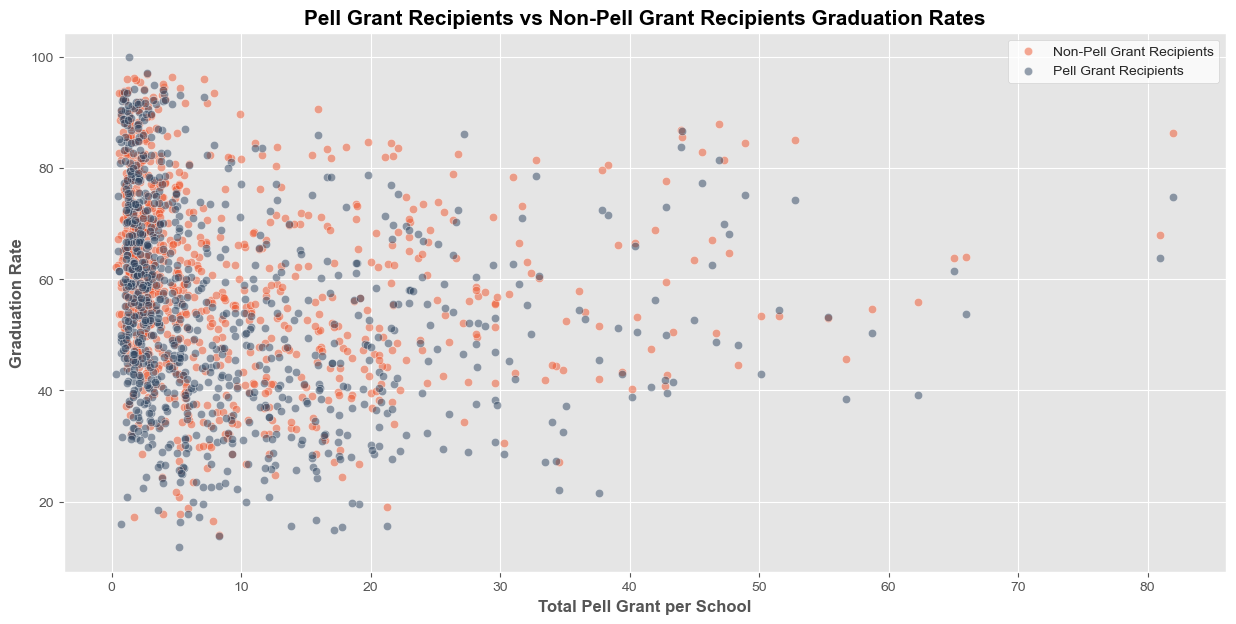

In [31]:
# Set the variables for the scatter plot
x = ThePellPartnership['total_pell_dollars_received_2012_13']/1000000
y1 = ThePellPartnership['2013_6_year_pell_grad_rate']
y2 = ThePellPartnership['2013_6_year_non_pell_grad_rate']

# Create the scatter plot
sns.scatterplot(x=x, y=y2, color='#ef552c', alpha=0.5, label='Non-Pell Grant Recipients')
sns.scatterplot(x=x, y=y1, color='#2f4560', alpha=0.5, label='Pell Grant Recipients')

# Add axis labels and title
plt.xlabel('Total Pell Grant per School', fontweight = 'bold')
plt.ylabel('Graduation Rate', fontweight = 'bold')
plt.title('Pell Grant Recipients vs Non-Pell Grant Recipients Graduation Rates', fontweight = 'bold', fontsize = 15)

# Remove gridlines from the background
sns.set_style('white')

# Add a legend
plt.legend()

# Show the plot
plt.show()

### Pell Grant Recipients vs Non-Pell Grant Recipients Graduation Rates

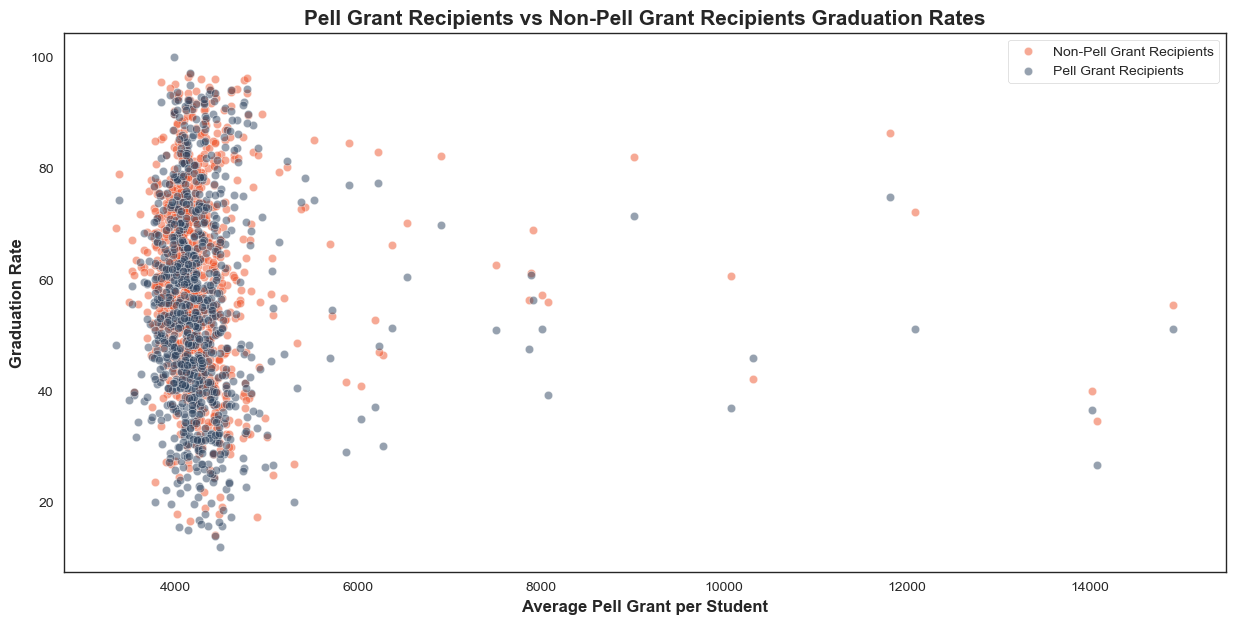

In [32]:
# Set the variables for the scatter plot
x = ThePellPartnership['avg_pell_grant_per_student']
y1 = ThePellPartnership['2013_6_year_pell_grad_rate']
y2 = ThePellPartnership['2013_6_year_non_pell_grad_rate']

# Create the scatter plot
sns.scatterplot(x=x, y=y2, color='#ef552c', alpha=0.5, label='Non-Pell Grant Recipients')
sns.scatterplot(x=x, y=y1, color='#2f4560', alpha=0.5, label='Pell Grant Recipients')

# Add axis labels and title
plt.xlabel('Average Pell Grant per Student', fontweight = 'bold')
plt.ylabel('Graduation Rate', fontweight = 'bold')
plt.title('Pell Grant Recipients vs Non-Pell Grant Recipients Graduation Rates', fontweight = 'bold', fontsize = 15)

# Remove gridlines from the background
sns.set_style('white')

# Add a legend
plt.legend()

# Show the plot
plt.show()

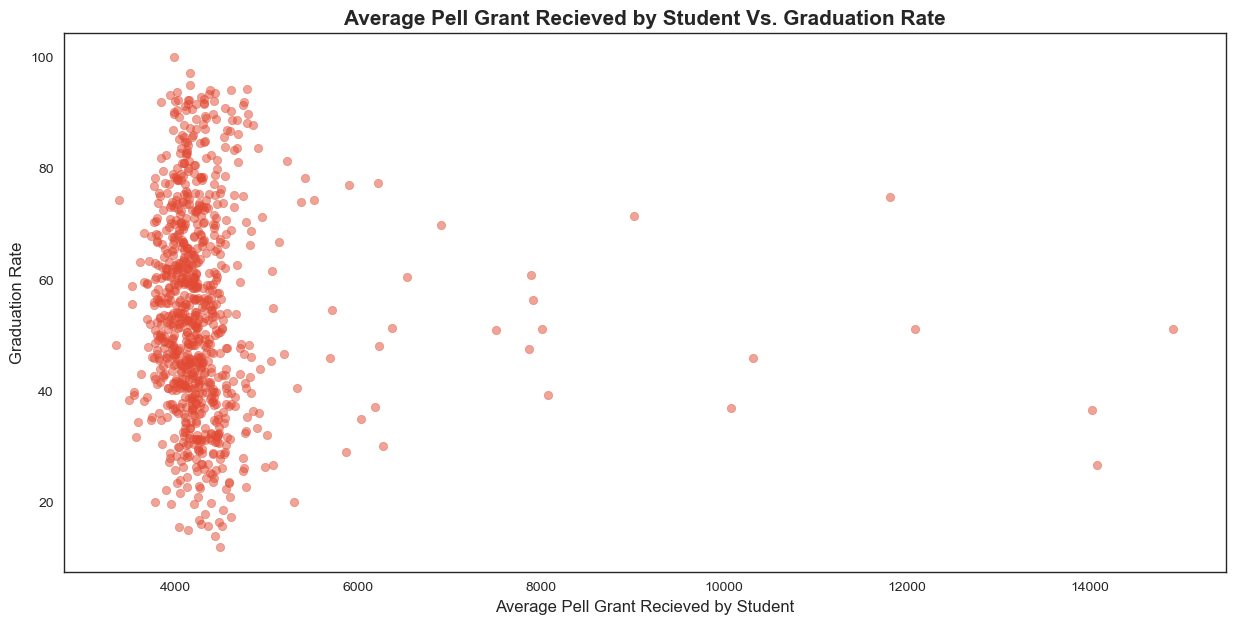

In [33]:
plt.scatter(ThePellPartnership['avg_pell_grant_per_student'], ThePellPartnership['2013_6_year_pell_grad_rate'], alpha=0.5)
plt.title('Average Pell Grant Recieved by Student Vs. Graduation Rate', fontweight = 'bold', fontsize = 15)
plt.xlabel('Average Pell Grant Recieved by Student')
plt.ylabel('Graduation Rate');

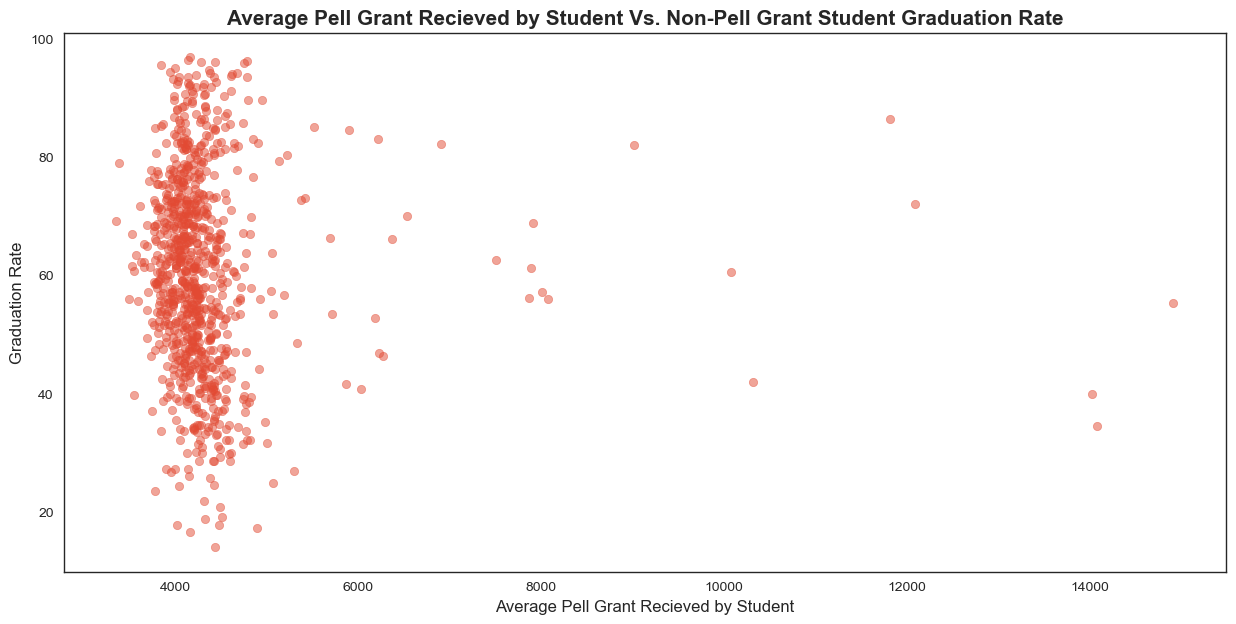

In [34]:
plt.scatter(ThePellPartnership['avg_pell_grant_per_student'], ThePellPartnership['2013_6_year_non_pell_grad_rate'], alpha=0.5)
plt.title('Average Pell Grant Recieved by Student Vs. Non-Pell Grant Student Graduation Rate', fontweight = 'bold', fontsize = 15)
plt.xlabel('Average Pell Grant Recieved by Student')
plt.ylabel('Graduation Rate');

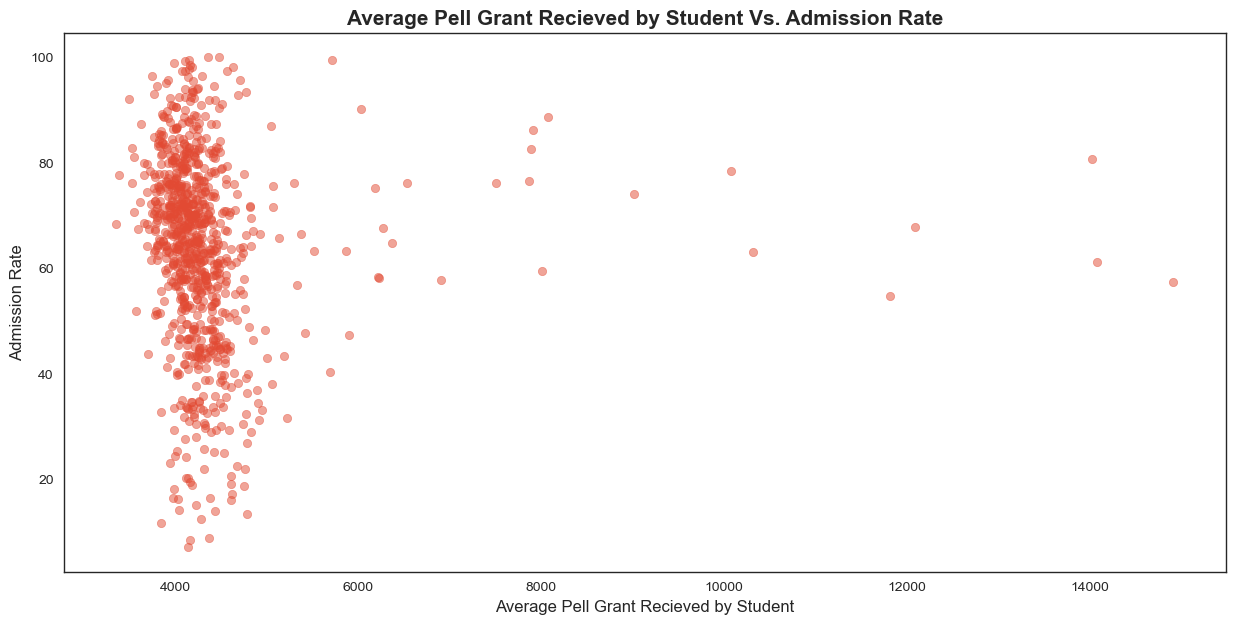

In [35]:
plt.scatter(ThePellPartnership['avg_pell_grant_per_student'], ThePellPartnership['admssn_rate'], alpha=0.5)
plt.title('Average Pell Grant Recieved by Student Vs. Admission Rate', fontweight = 'bold', fontsize = 15)
plt.xlabel('Average Pell Grant Recieved by Student')
plt.ylabel('Admission Rate');

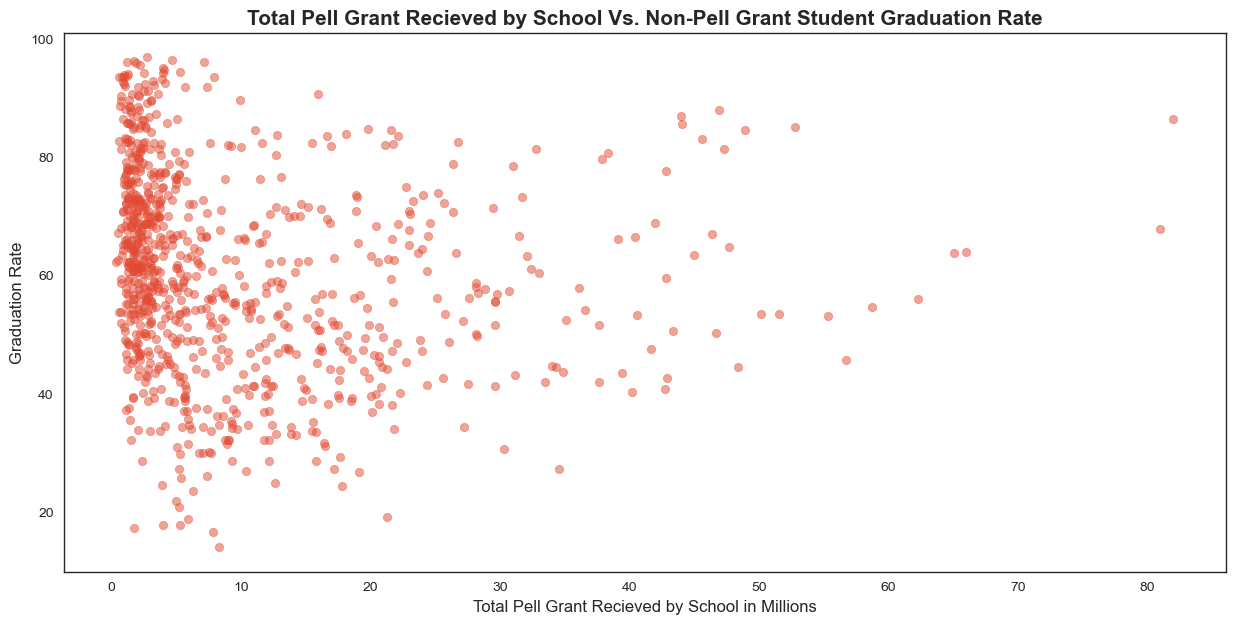

In [36]:
plt.scatter(ThePellPartnership['total_pell_dollars_received_2012_13']/1000000, ThePellPartnership['2013_6_year_non_pell_grad_rate'], alpha=0.5)
plt.title('Total Pell Grant Recieved by School Vs. Non-Pell Grant Student Graduation Rate', fontweight = 'bold', fontsize = 15)
plt.xlabel('Total Pell Grant Recieved by School in Millions')
plt.ylabel('Graduation Rate');

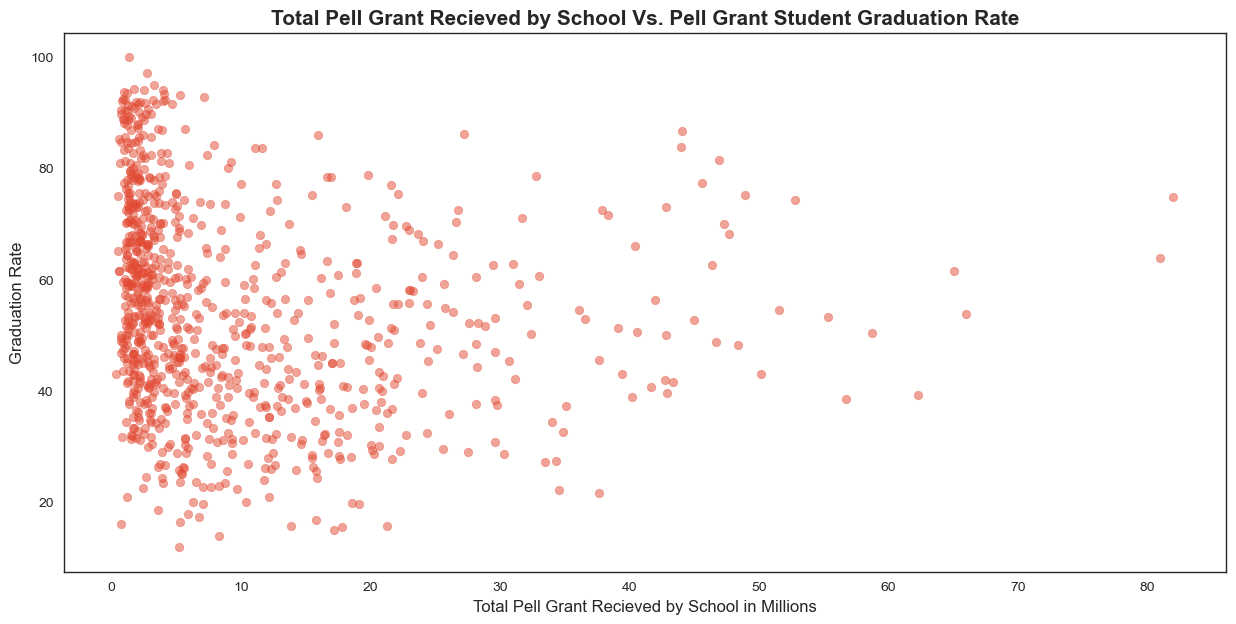

In [37]:
plt.scatter(ThePellPartnership['total_pell_dollars_received_2012_13']/1000000, ThePellPartnership['2013_6_year_pell_grad_rate'], alpha=0.5)
plt.title('Total Pell Grant Recieved by School Vs. Pell Grant Student Graduation Rate', fontweight = 'bold', fontsize = 15)
plt.xlabel('Total Pell Grant Recieved by School in Millions')
plt.ylabel('Graduation Rate');

In [38]:
high_pell_rec_df = ThePellPartnership[['institution', 'state', 'percent_pell_recipients_among_undergraduates', '2013_6_year_pell_grad_rate']].sort_values(
    'percent_pell_recipients_among_undergraduates',ascending=False).head(20).reset_index(drop=True)

high_pell_rec_df

institution state  \
0            Florida Memorial University    FL   
1                     Claflin University    SC   
2                Alcorn State University    MS   
3             Bethune-Cookman University    FL   
4                     Dillard University    LA   
5           Fort Valley State University    GA   
6               Central State University    OH   
7            The College of New Rochelle    NY   
8             Grambling State University    LA   
9                Albany State University    GA   
10              Clark Atlanta University    GA   
11       Elizabeth City State University    NC   
12  University of Arkansas at Pine Bluff    AR   
13            Johnson C Smith University    NC   
14              Chicago State University    IL   
15             Virginia State University    VA   
16             Texas Southern University    TX   
17                     Chowan University    NC   
18              William Carey University    MS   
19         Prairie View A & M University    TX   

    percent_pell_recipients_among_undergraduates  2013_6_year_pell_grad_rate  
0                                           89.8                        36.0  
1                                           80.4                        40.2  
2                                           79.2                        35.3  
3                                           77.6                        36.3  
4                                           76.8                        48.1  
5                                           76.5                        26.0  
6                                           75.8                        22.7  
7                                           75.5                        26.6  
8                                           73.5                        27.9  
9                                           72.3                        37.2  
10                                          70.8                        42.4  
11                                          70.3                        38.9  
12                                          69.9                        23.4  
13                                          69.4                        46.1  
14                                          68.7                        15.6  
15                                          68.3                        38.4  
16                                          67.2                        15.6  
17                                          67.1                        24.3  
18                                          66.0                        55.6  
19                                          65.4                        28.6

In [39]:
# Convert table to HTML
#html = high_pell_rec_df.to_html(index=False)

# Save HTML as PNG image
#imgkit.from_string(html, 'top_20_pell_grant_recipients.png')

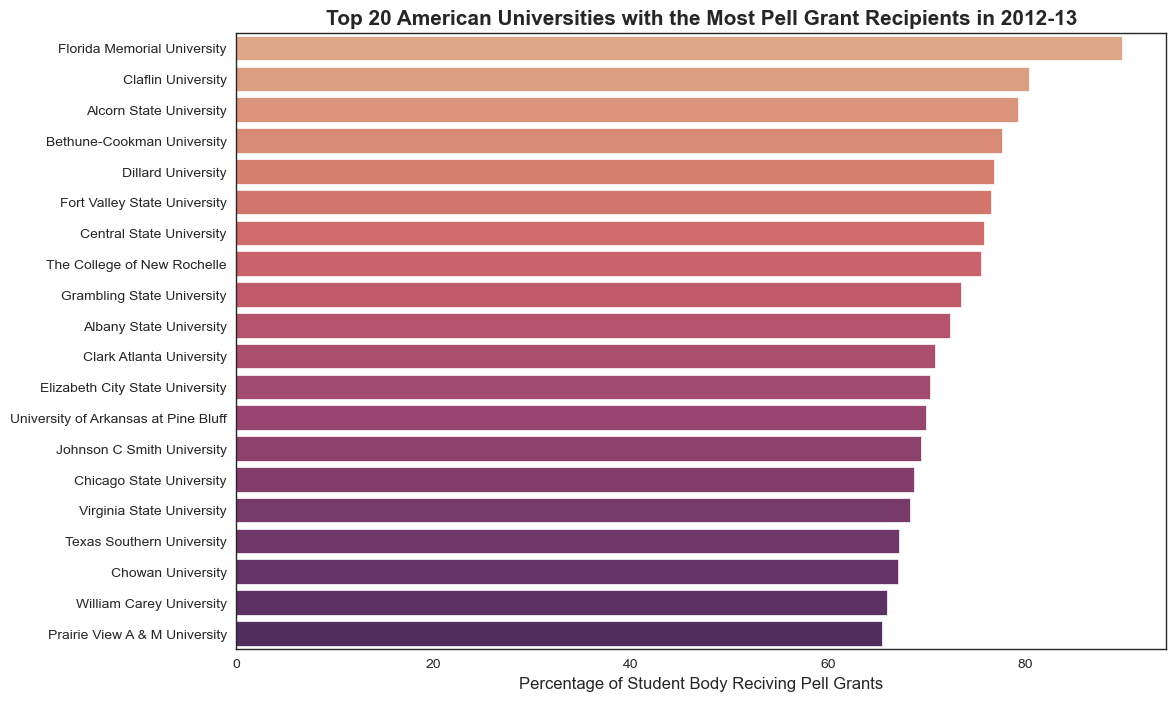

In [40]:
# Top 20 American Universities with the Most Pell Grant Recipients in 2012-13

plt.figure(figsize=(12,8))
plt.rcParams['font.size'] = 10
sns.barplot(x='percent_pell_recipients_among_undergraduates',y='institution',data=high_pell_rec_df, palette='flare')
plt.title('Top 20 American Universities with the Most Pell Grant Recipients in 2012-13', fontweight = 'bold', fontsize = 15)
plt.xlabel('Percentage of Student Body Reciving Pell Grants')
plt.ylabel('');

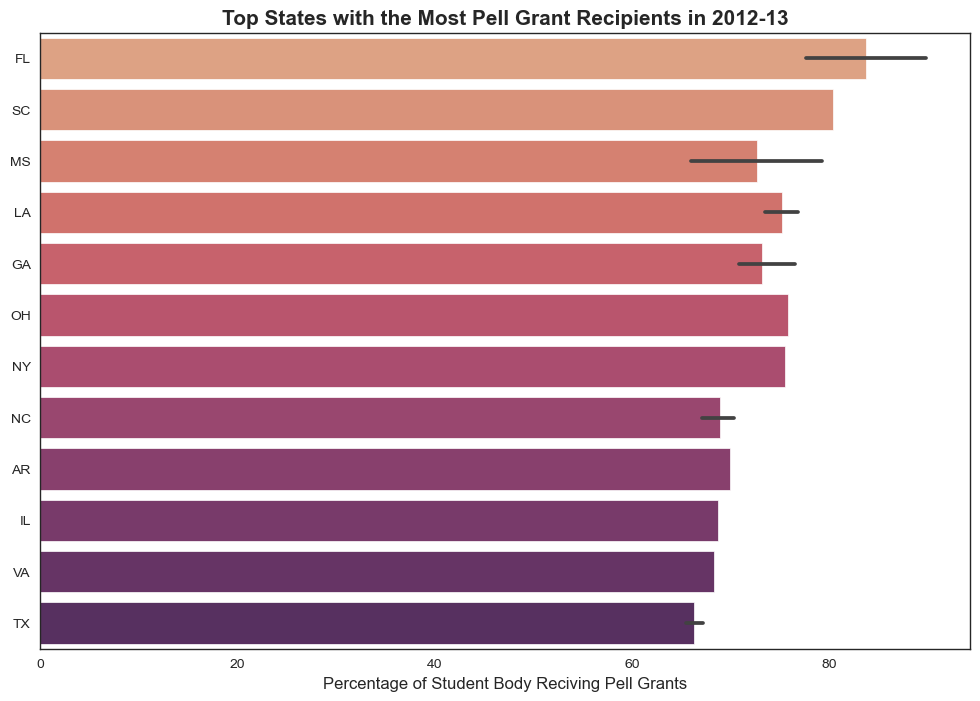

In [41]:
# Top States with the Most Pell Grant Recipients in 2012-13

plt.figure(figsize=(12,8))
plt.rcParams['font.size'] = 10
sns.barplot(x='percent_pell_recipients_among_undergraduates',y='state',data=high_pell_rec_df, palette='flare')
plt.title('Top States with the Most Pell Grant Recipients in 2012-13', fontweight = 'bold', fontsize = 15)
plt.xlabel('Percentage of Student Body Reciving Pell Grants')
plt.ylabel('');

In [42]:
high_net_cost_df = ThePellPartnership[['institution', 'state', 'net_price_for_low_income_students']].sort_values(
    'net_price_for_low_income_students',ascending=False).head(20).reset_index(drop=True)

high_net_cost_df

institution state  \
0                         The College of New Rochelle    NY   
1                      Catholic University of America    DC   
2   Embry Riddle Aeronautical University-Daytona B...    FL   
3                             Sacred Heart University    CT   
4                   Southern New Hampshire University    NH   
5                                     Emerson College    MA   
6                            Clark Atlanta University    GA   
7                               High Point University    NC   
8                   Saint Marys College of California    CA   
9                                  Hofstra University    NY   
10                                Tuskegee University    AL   
11                                   Carthage College    WI   
12                                  Lesley University    MA   
13                        Indiana Wesleyan University    IN   
14                          Saint Joseph's University    PA   
15                                 Seattle University    WA   
16                    Florida Institute of Technology    FL   
17                                  Bryant University    RI   
18                                  Baylor University    TX   
19                              Quinnipiac University    CT   

    net_price_for_low_income_students  
0                               33048  
1                               31970  
2                               30738  
3                               30549  
4                               30269  
5                               29610  
6                               29006  
7                               28894  
8                               28173  
9                               28162  
10                              27806  
11                              27740  
12                              27727  
13                              27683  
14                              27628  
15                              27019  
16                              27015  
17                              26524  
18                              26425  
19                              26380

In [43]:
# Convert table to HTML
#html = high_net_cost_df.to_html(index=False)

# Save HTML as PNG image
#imgkit.from_string(html, 'top_20_schools_price.png')

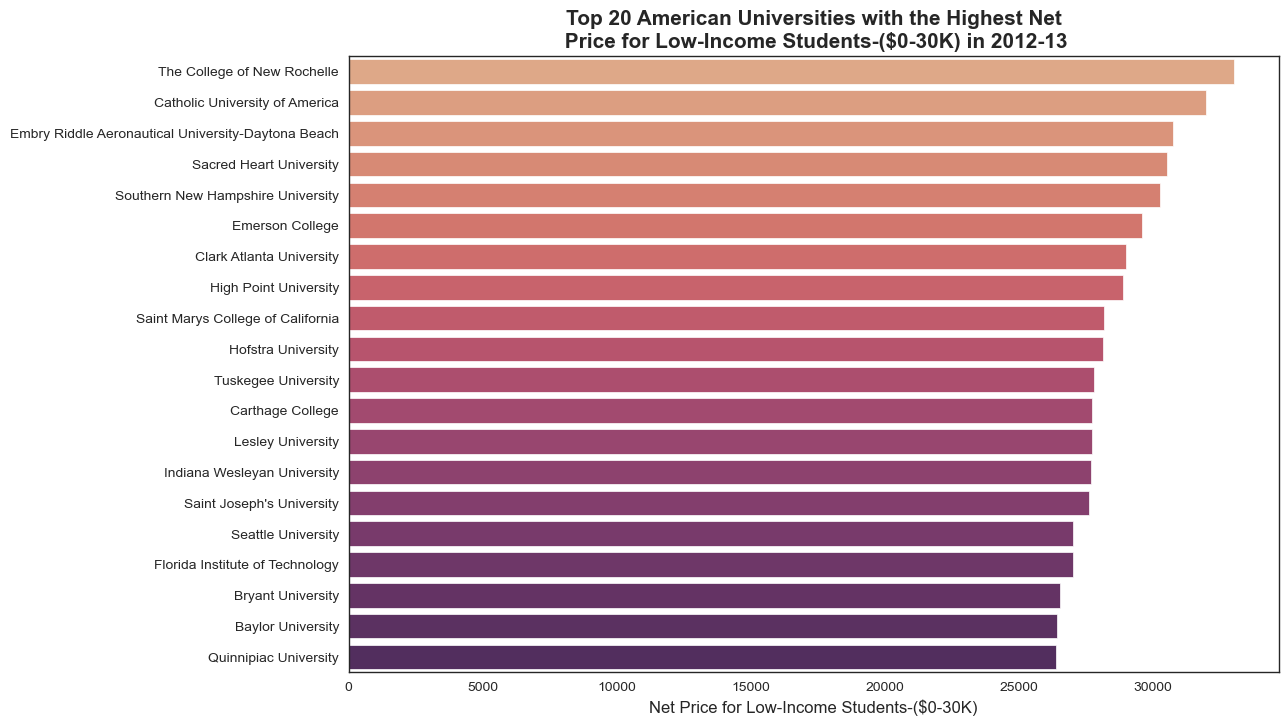

In [44]:
# Top 20 American Universities with Highest Net Price for Low-Income Students-($0-30K) in 2012-13

plt.figure(figsize=(12,8))
plt.rcParams['font.size'] = 10
sns.barplot(x='net_price_for_low_income_students',y='institution',data=high_net_cost_df, palette='flare')
plt.title('Top 20 American Universities with the Highest Net\n Price for Low-Income Students-($0-30K) in 2012-13', fontweight = 'bold', fontsize = 15)
plt.xlabel('Net Price for Low-Income Students-($0-30K)')
plt.ylabel('');

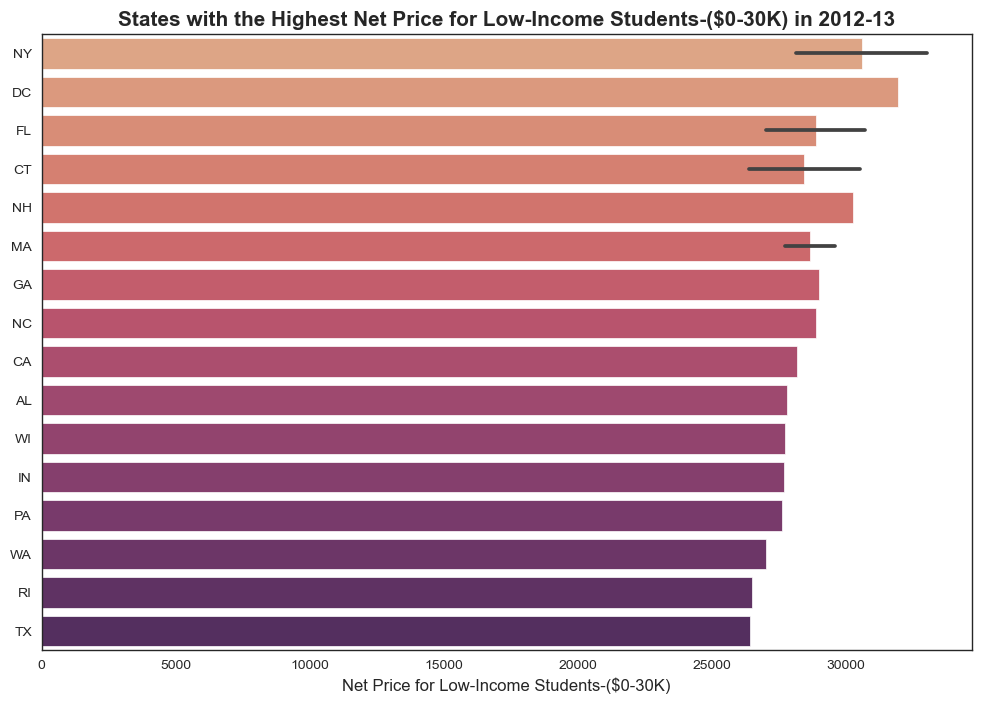

In [45]:
# Top States with the Highest Net Price for Low-Income Students-($0-30K) in 2012-13

plt.figure(figsize=(12,8))
plt.rcParams['font.size'] = 10
sns.barplot(x='net_price_for_low_income_students',y='state',data=high_net_cost_df, palette='flare')
plt.title('States with the Highest Net Price for Low-Income Students-($0-30K) in 2012-13', fontweight = 'bold', fontsize = 15)
plt.xlabel('Net Price for Low-Income Students-($0-30K)')
plt.ylabel('');

In [46]:
total_pell_dollars_df = ThePellPartnership[['institution', 'state', 'total_pell_dollars_received_2012_13']].sort_values(
    'total_pell_dollars_received_2012_13',ascending=False).head(20)
total_pell_dollars_df['total_pell_dollars_received_2012_13'] = round(total_pell_dollars_df['total_pell_dollars_received_2012_13'] / 1000000, 2)
total_pell_dollars_df

institution state  \
784  Pennsylvania State University-Main Campus    PA   
677              University of Central Florida    FL   
743     California State University-Long Beach    CA   
874                University of South Florida    FL   
800          Kent State University-Kent Campus    OH   
745      California State University-Fullerton    CA   
742     California State University-Sacramento    CA   
649                   Georgia State University    GA   
818          Ohio State University-Main Campus    OH   
634             Brigham Young University-Idaho    ID   
746         California State University-Fresno    CA   
741             University of California-Davis    CA   
719             San Francisco State University    CA   
739         University of California-Riverside    CA   
786          The University of Texas at Austin    TX   
670                      University of Florida    FL   
101                  University of North Texas    TX   
848                 San Diego State University    CA   
791    University of Washington-Seattle Campus    WA   
769                      University of Arizona    AZ   

     total_pell_dollars_received_2012_13  
784                                81.97  
677                                80.98  
743                                65.98  
874                                65.01  
800                                62.29  
745                                58.71  
742                                56.70  
649                                55.29  
818                                52.76  
634                                51.53  
746                                50.16  
741                                48.91  
719                                48.37  
739                                47.63  
786                                47.26  
670                                46.88  
101                                46.66  
848                                46.32  
791                                45.62  
769                                45.01

In [47]:
# Convert table to HTML
#html = total_pell_dollars_df.to_html(index=False)

# Save HTML as PNG image
#imgkit.from_string(html, 'total_pell_dollars.png')

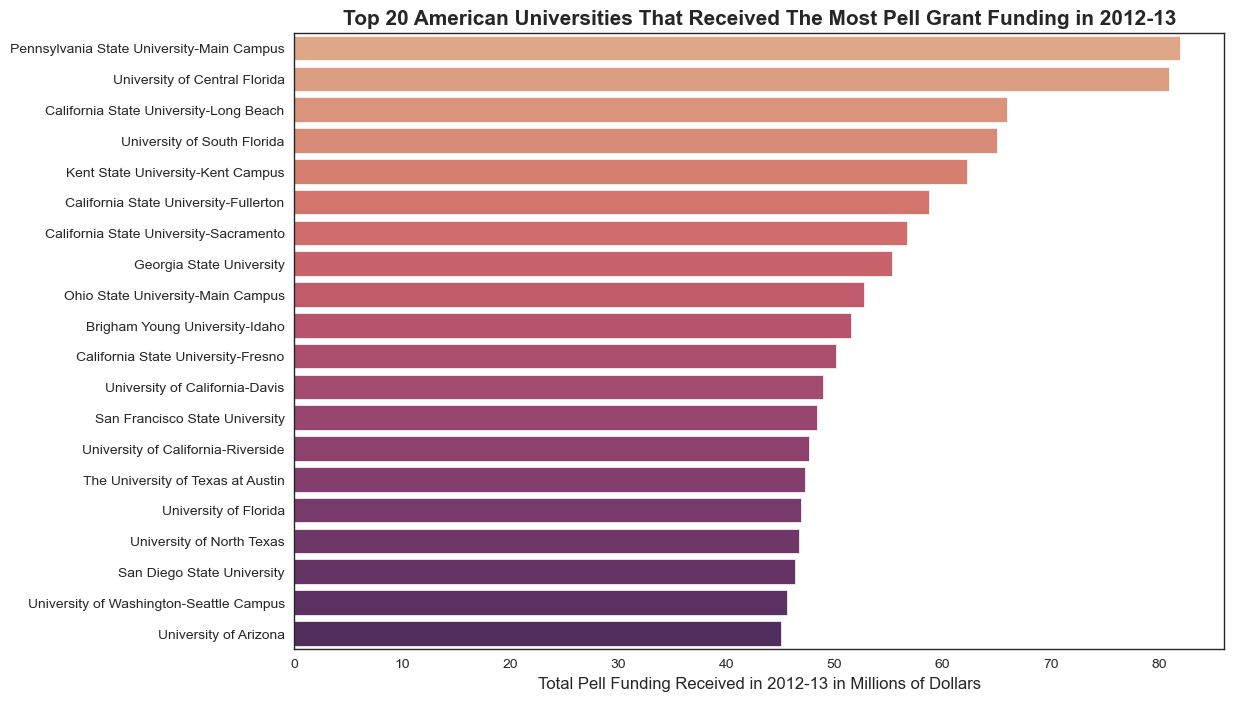

In [48]:
# Top 20 American Universities That Received The Most Pell Grant Funding in 2012-13

plt.figure(figsize=(12,8))
plt.rcParams['font.size'] = 10
sns.barplot(x='total_pell_dollars_received_2012_13',y='institution',data=total_pell_dollars_df, palette='flare')
plt.title('Top 20 American Universities That Received The Most Pell Grant Funding in 2012-13', fontweight = 'bold', fontsize = 15)
plt.xlabel('Total Pell Funding Received in 2012-13 in Millions of Dollars')
plt.ylabel('');

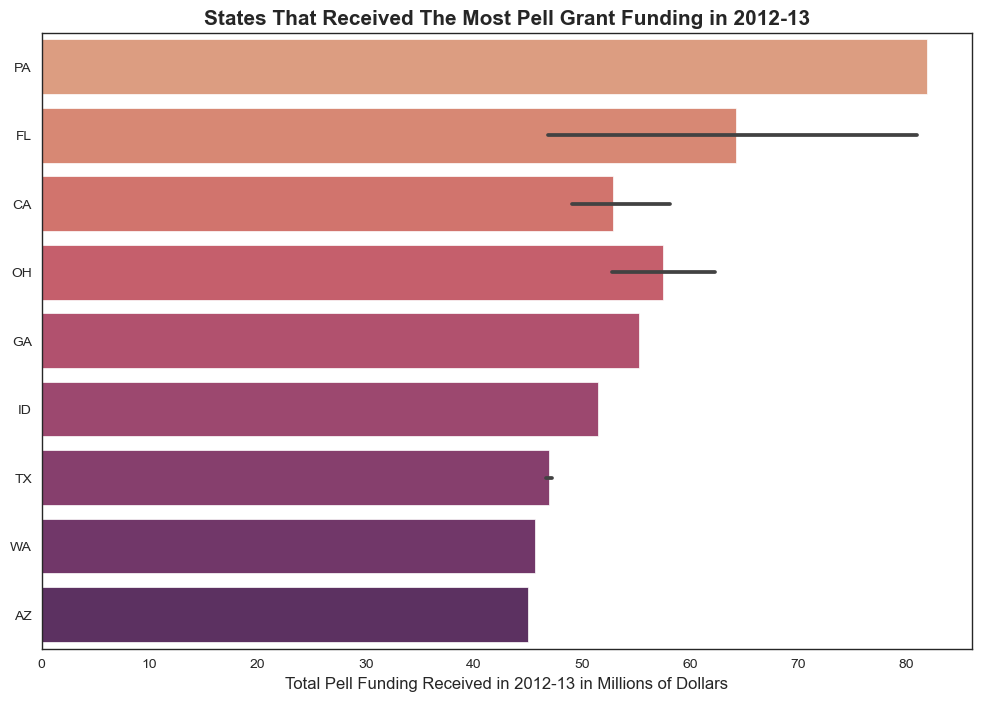

In [49]:
# Top States That Received The Most Pell Grant Funding in 2012-13

plt.figure(figsize=(12,8))
plt.rcParams['font.size'] = 10
sns.barplot(x='total_pell_dollars_received_2012_13',y='state',data=total_pell_dollars_df, palette='flare')
plt.title('States That Received The Most Pell Grant Funding in 2012-13', fontweight = 'bold', fontsize = 15)
plt.xlabel('Total Pell Funding Received in 2012-13 in Millions of Dollars')
plt.ylabel('');

In [50]:
pell_grad_rate_df = ThePellPartnership[['institution', 'state', '2013_6_year_pell_grad_rate']].sort_values(
    '2013_6_year_pell_grad_rate',ascending=False).head(20)
pell_grad_rate_df

institution state  2013_6_year_pell_grad_rate
358          Colgate University    NY                       100.0
369        Princeton University    NJ                        97.2
797    Johns Hopkins University    MD                        95.0
489             Amherst College    MA                        94.3
298             Duke University    NC                        94.1
685         Wesleyan University    CT                        94.0
299            Davidson College    NC                        93.8
722              Pomona College    CA                        93.5
172            Brown University    RI                        93.3
613     Northwestern University    IL                        93.1
191  University of Pennsylvania    PA                        92.8
707            Colorado College    CO                        92.4
431            Carleton College    MN                        92.3
679       Georgetown University    DC                        92.2
629       University of Chicago    IL                        92.2
579    University of Notre Dame    IN                        92.1
207           Haverford College    PA                        92.1
459            Williams College    MA                        92.0
380           Dartmouth College    NH                        91.9
464            Tufts University    MA                        91.7

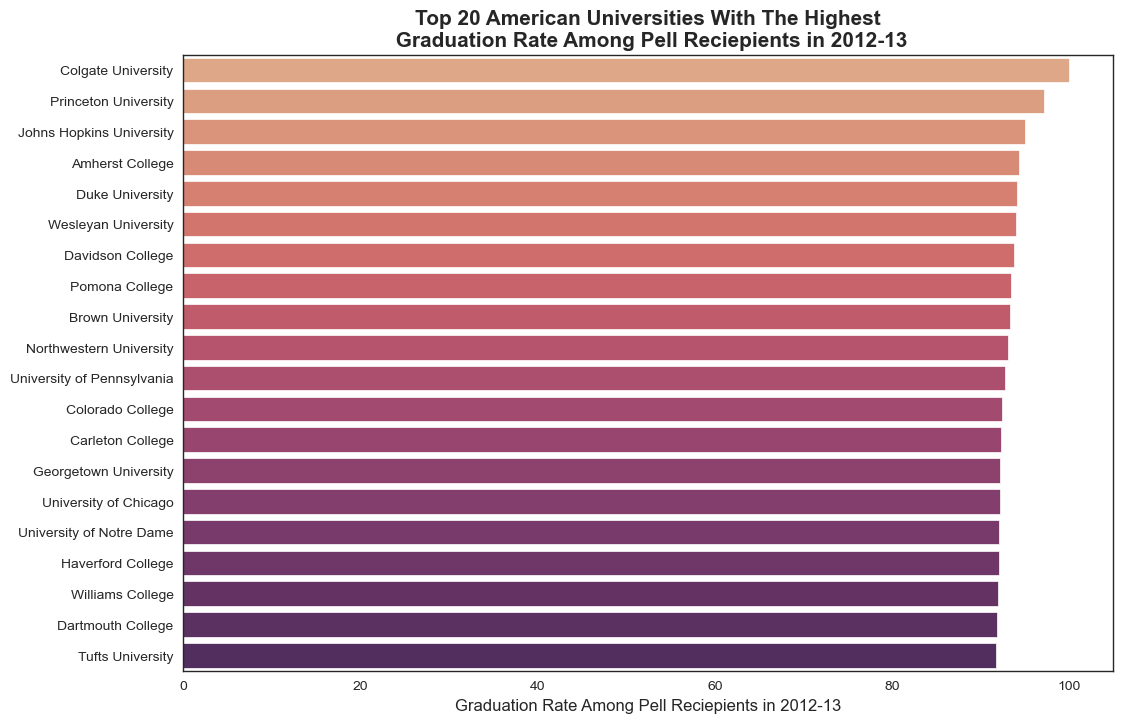

In [51]:
# Top 20 American Universities With The Highest Graduation Rate Among Pell Reciepients in 2012-13

plt.figure(figsize=(12,8))
plt.rcParams['font.size'] = 10
sns.barplot(x='2013_6_year_pell_grad_rate',y='institution',data=pell_grad_rate_df, palette='flare')
plt.title('Top 20 American Universities With The Highest\n Graduation Rate Among Pell Reciepients in 2012-13', fontweight = 'bold', fontsize = 15)
plt.xlabel('Graduation Rate Among Pell Reciepients in 2012-13')
plt.ylabel('');

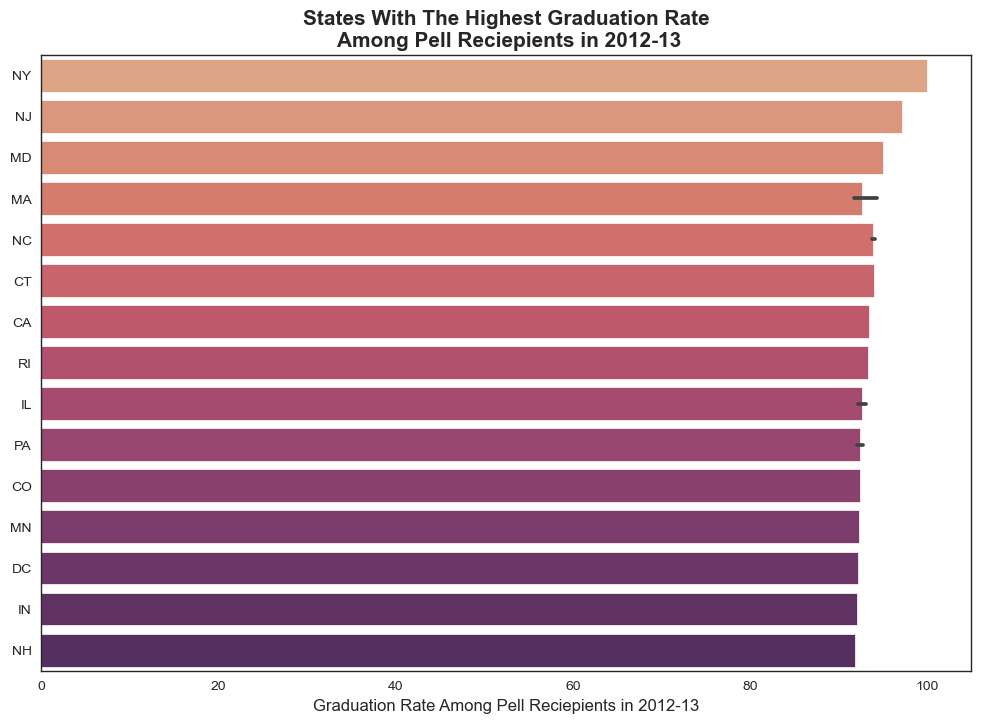

In [52]:
# Top States With The Highest Graduation Rate Among Pell Reciepients in 2012-13

plt.figure(figsize=(12,8))
plt.rcParams['font.size'] = 10
sns.barplot(x='2013_6_year_pell_grad_rate',y='state',data=pell_grad_rate_df, palette='flare')
plt.title('States With The Highest Graduation Rate\n Among Pell Reciepients in 2012-13', fontweight = 'bold', fontsize = 15)
plt.xlabel('Graduation Rate Among Pell Reciepients in 2012-13')
plt.ylabel('');

In [53]:
non_pell_grad_rate_df = ThePellPartnership[['institution', 'state', '2013_6_year_non_pell_grad_rate']].sort_values(
    '2013_6_year_non_pell_grad_rate',ascending=False).head(20)
non_pell_grad_rate_df

institution state  2013_6_year_non_pell_grad_rate
369                Princeton University    NJ                            96.9
7                   Stanford University    CA                            96.4
489                     Amherst College    MA                            96.2
722                      Pomona College    CA                            96.0
191          University of Pennsylvania    PA                            96.0
459                    Williams College    MA                            95.9
380                   Dartmouth College    NH                            95.5
579            University of Notre Dame    IN                            95.1
172                    Brown University    RI                            94.7
613             Northwestern University    IL                            94.4
307                      Vassar College    NY                            94.3
298                     Duke University    NC                            94.3
872                  Middlebury College    VT                            94.1
182                  Swarthmore College    PA                            93.9
514                     Bowdoin College    ME                            93.7
734           Claremont McKenna College    CA                            93.6
54   University of Virginia-Main Campus    VA                            93.5
207                   Haverford College    PA                            93.5
515                       Bates College    ME                            93.5
119               Vanderbilt University    TN                            93.2

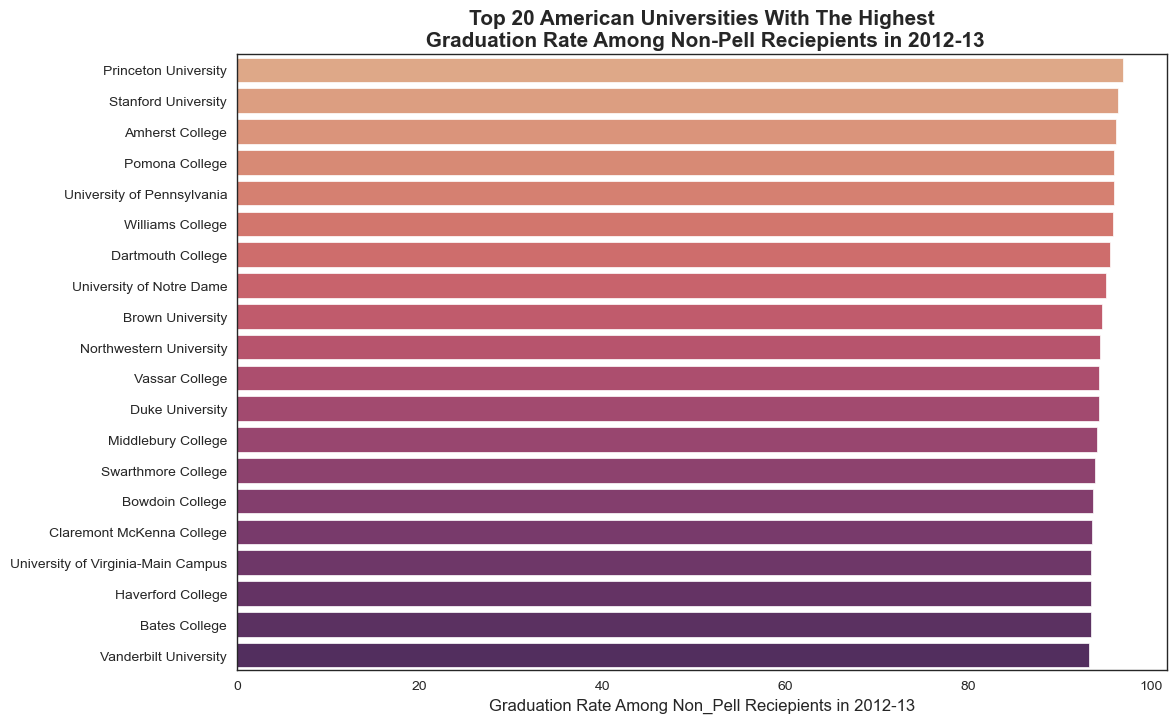

In [54]:
# Top 20 American Universities With The Highest Graduation Rate Among Non-Pell Reciepients in 2012-13

plt.figure(figsize=(12,8))
plt.rcParams['font.size'] = 10
sns.barplot(x='2013_6_year_non_pell_grad_rate',y='institution',data=non_pell_grad_rate_df, palette='flare')
plt.title('Top 20 American Universities With The Highest\n Graduation Rate Among Non-Pell Reciepients in 2012-13', fontweight = 'bold', fontsize = 15)
plt.xlabel('Graduation Rate Among Non_Pell Reciepients in 2012-13')
plt.ylabel('');

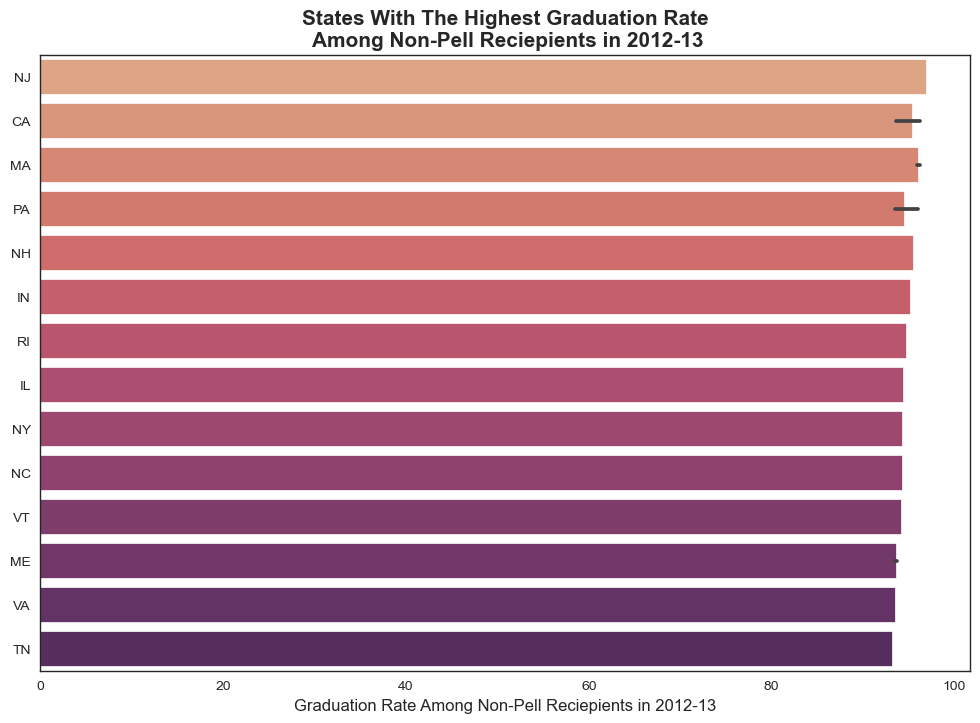

In [55]:
# Top States With The Highest Graduation Rate Among Non-Pell Reciepients in 2012-13

plt.figure(figsize=(12,8))
plt.rcParams['font.size'] = 10
sns.barplot(x='2013_6_year_non_pell_grad_rate',y='state',data=non_pell_grad_rate_df, palette='flare')
plt.title('States With The Highest Graduation Rate\n Among Non-Pell Reciepients in 2012-13', fontweight = 'bold', fontsize = 15)
plt.xlabel('Graduation Rate Among Non-Pell Reciepients in 2012-13')
plt.ylabel('');

## 3.1 Maps

In [56]:
map_df = ThePellPartnership[['state', 'net_price_for_low_income_students', 'total_pell_dollars_received_2012_13']]

new_map_df = map_df.groupby('state').agg({'net_price_for_low_income_students': 'mean', 'total_pell_dollars_received_2012_13': 'sum'}).reset_index()

new_map_df[['net_price_for_low_income_students']] = new_map_df[['net_price_for_low_income_students']].round(2)

new_map_df

state  net_price_for_low_income_students  \
0     AL                           14705.79   
1     AR                           10188.79   
2     AZ                           11252.00   
3     CA                           13456.00   
4     CO                           12624.57   
5     CT                           17315.07   
6     DC                           21381.75   
7     DE                           10945.00   
8     FL                           16700.54   
9     GA                           13960.59   
10    HI                           12414.50   
11    IA                           15196.94   
12    ID                           10077.80   
13    IL                           15241.23   
14    IN                           12320.23   
15    KS                           14538.14   
16    KY                           11825.36   
17    LA                            9188.33   
18    MA                           16379.71   
19    MD                           13746.15   
20    ME                           13713.78   
21    MI                           11537.71   
22    MN                           13372.77   
23    MO                           13489.08   
24    MS                           14169.36   
25    MT                           14008.20   
26    NC                           13100.84   
27    ND                           11040.80   
28    NE                           15877.78   
29    NH                           20021.67   
30    NJ                           13670.44   
31    NM                           14027.00   
32    NV                           10831.00   
33    NY                           14531.87   
34    OH                           16157.33   
35    OK                           10838.25   
36    OR                           16243.42   
37    PA                           17131.11   
38    RI                           17649.12   
39    SC                           13589.68   
40    SD                           12410.00   
41    TN                           13331.00   
42    TX                           13597.39   
43    UT                           13752.00   
44    VA                           14140.15   
45    VT                           16462.40   
46    WA                           15164.77   
47    WI                           12933.04   
48    WV                           10468.50   
49    WY                            8336.00   

    total_pell_dollars_received_2012_13  
0                             141937388  
1                             152032449  
2                              80119612  
3                            1013950035  
4                             165534328  
5                              88779448  
6                              16822368  
7                              17807704  
8                             465154542  
9                             314927131  
10                             35956279  
11                             89676544  
12                            106883237  
13                            303846156  
14                            271820069  
15                             98289224  
16                            160489682  
17                            180112324  
18                            139473997  
19                            138502262  
20                             24432398  
21                            330489366  
22                            121969392  
23                             99331299  
24                            135640396  
25                             47103974  
26                            327864491  
27                             23914533  
28                             37854575  
29                             37503291  
30                            155001293  
31                              9483050  
32                             48290685  
33                            465377307  
34                            330303251  
35                            119950999  
36                            132090741  
37       

In [57]:
# Convert table to HTML
#html = new_map_df.to_html(index=False)

# Save HTML as PNG image
#imgkit.from_string(html, 'state_net_price.png')

In [58]:
import plotly.express as px # graphing interactive map from data

In [59]:
fig = px.choropleth(new_map_df, 
                    locations="state",  # DataFrame column with locations
                    color="net_price_for_low_income_students",  # DataFrame column with color values
                    hover_name="state", # DataFrame column hover info
                    locationmode = 'USA-states', # Set to plot as US States
                    color_continuous_scale='sunsetdark')
                    #color_continuous_scale=[(0, "rgb(139,154,180)"), (0.2, "rgb(240,146,116)"), (1, "rgb(221,96,59)")])


fig.update_layout(title_text = 'Average Net Price For Low Income Students by State',
                  geo_scope='usa',
                  coloraxis_colorbar_title='')

fig.show()

In [60]:
fig = px.choropleth(new_map_df, 
                    locations="state",  # DataFrame column with locations
                    color="total_pell_dollars_received_2012_13",  # DataFrame column with color values
                    hover_name="state", # DataFrame column hover info
                    locationmode = 'USA-states', # Set to plot as US States
                    color_continuous_scale='sunsetdark')
                    #color_continuous_scale=[(0, "rgb(139,154,180)"), (0.2, "rgb(240,146,116)"), (1, "rgb(221,96,59)")])


fig.update_layout(title_text = 'Total Pell Dollars Received 2012-13 by State',
                  geo_scope='usa',
                  coloraxis_colorbar_title='',
                  plot_bgcolor="rgba(0,0,0,0)",
                  paper_bgcolor="rgba(0,0,0,0)")

fig.show()

In [61]:
ThePellPartnership.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877 entries, 0 to 876
Data columns (total 22 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   index                                                            877 non-null    int64  
 1   unitid                                                           877 non-null    int64  
 2   admssn                                                           877 non-null    float64
 3   applcn                                                           877 non-null    float64
 4   institution                                                      877 non-null    object 
 5   state                                                            877 non-null    object 
 6   sector                                                           877 non-null    object 
 7   minority_serving_institution                

# 4. Model Preperation

The first model will be a logistic regression model to predict graduation rates of students recieving Pell Grants.

***Select Columns***

In [62]:
interesting_columns = ['state', 'sector', 'admssn', 'applcn', 'number_of_undergraduates',
            'percent_pell_recipients_among_undergraduates', 'net_price_for_low_income_students',
            'total_pell_dollars_received_2012_13', '2013_6_year_pell_grad_rate']

In [63]:
model_1_df = ThePellPartnership[interesting_columns].copy()
model_1_df

state             sector   admssn   applcn  number_of_undergraduates  \
0      CA             Public   3304.0   5745.0                      4736   
1      FL             Public   6246.0   9199.0                     12230   
2      CA             Public   5364.0  10263.0                      5185   
3      CA             Public   4055.0   9937.0                      9929   
4      FL             Public    715.0   1272.0                       832   
..    ...                ...      ...      ...                       ...   
872    VT  Private Nonprofit   1375.0   7984.0                      2516   
873    CO             Public   3235.0   5413.0                     13103   
874    FL             Public  11107.0  29194.0                     31125   
875    OR  Private Nonprofit    667.0   1090.0                       551   
876    PA  Private Nonprofit   2411.0   3665.0                      1885   

     percent_pell_recipients_among_undergraduates  \
0                                            39.6   
1                                            34.7   
2                                            47.6   
3                                            43.1   
4                                            28.6   
..                                            ...   
872                                          11.0   
873                                          27.8   
874                                          41.3   
875                                          53.4   
876                                          21.8   

     net_price_for_low_income_students  total_pell_dollars_received_2012_13  \
0                                10665                              8531522   
1                                10778                             17619384   
2                                 5334                             11748041   
3                                 8427                             18153065   
4                                 7007                              1060041   
..                                 ...                                  ...   
872                               7357                              1279762   
873                               9870                             14829461   
874                               6688                             65008116   
875                              18464                              4140336   
876                              18683                              2112120   

     2013_6_year_pell_grad_rate  
0                          47.6  
1                          45.0  
2                          41.4  
3                          40.7  
4                          65.5  
..                          ...  
872                        88.7  
873                        41.2  
874                        61.5  
875                        26.5  
876                        66.7  

[877 rows x 9 columns]

<AxesSubplot:>

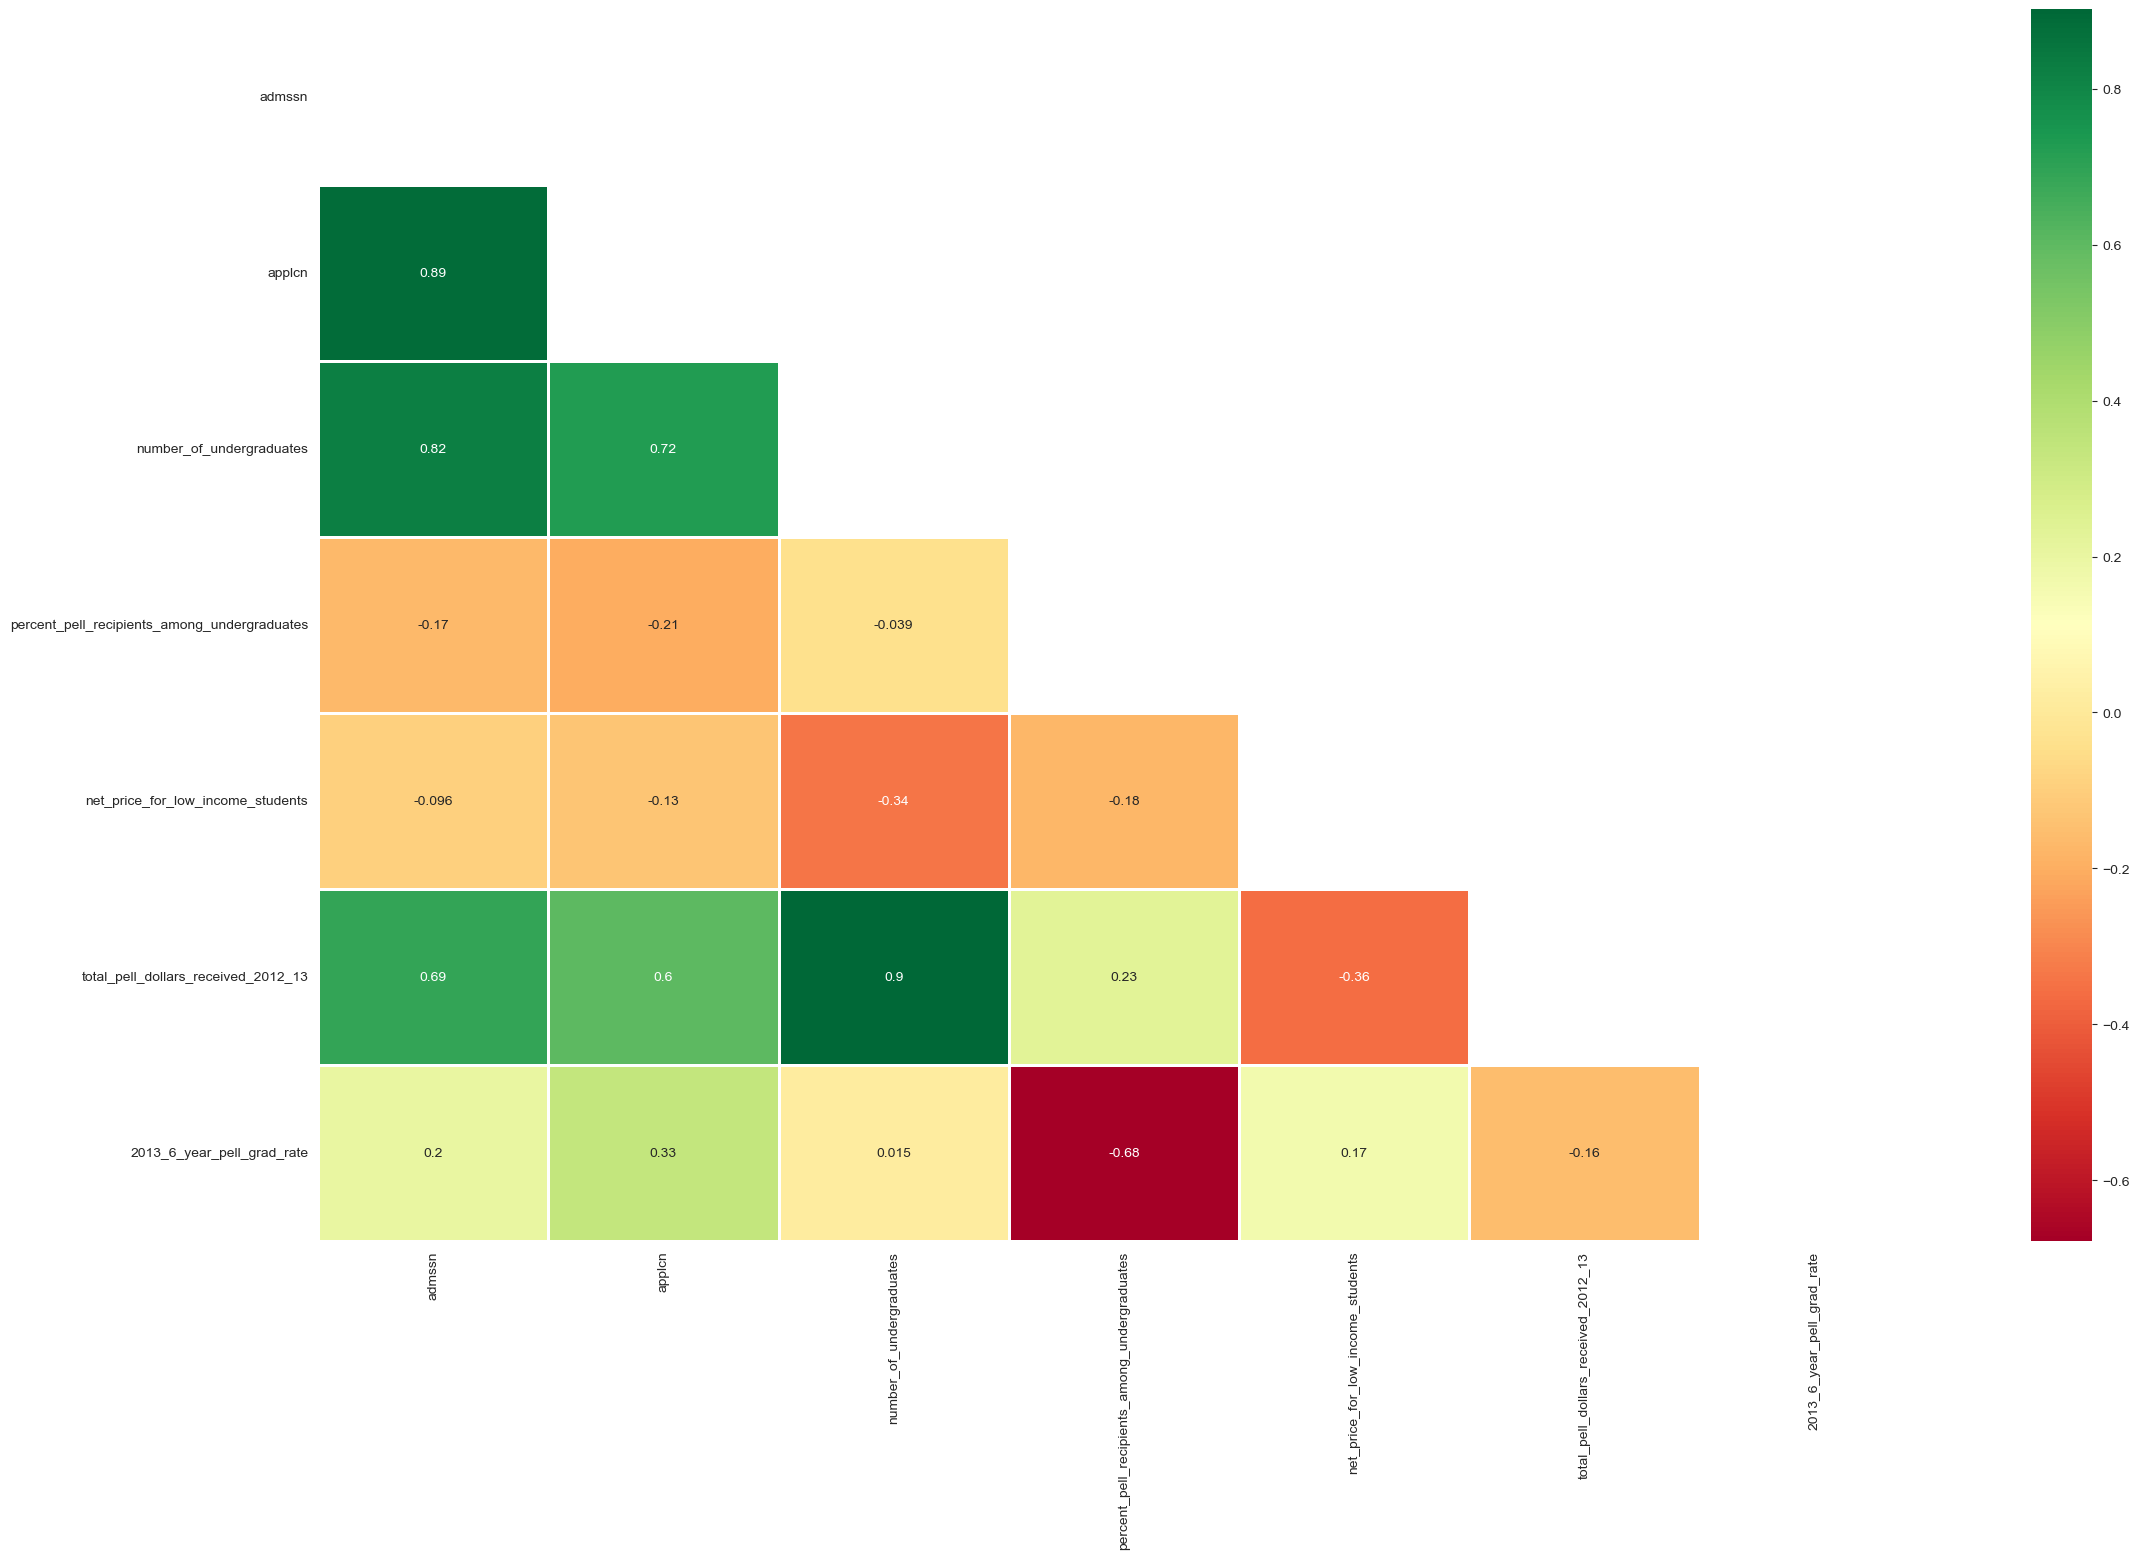

In [64]:
mask = np.zeros_like(model_1_df.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (26,16))
sns.heatmap(model_1_df.corr(), mask=mask, annot=True, cmap="RdYlGn", linewidths=.75)

## 4.1 Data Binning

In [65]:
min_value = model_1_df['2013_6_year_pell_grad_rate'].min()
max_value = model_1_df['2013_6_year_pell_grad_rate'].max()
mean_value = model_1_df['2013_6_year_pell_grad_rate'].mean()
print(min_value)
print(max_value)
print(mean_value)

11.8
100.0
54.29760547320412


(array([ 17.,  56., 110., 154., 151., 135., 105.,  74.,  50.,  25.]),
 array([ 11.8 ,  20.62,  29.44,  38.26,  47.08,  55.9 ,  64.72,  73.54,
         82.36,  91.18, 100.  ]),
 <BarContainer object of 10 artists>)

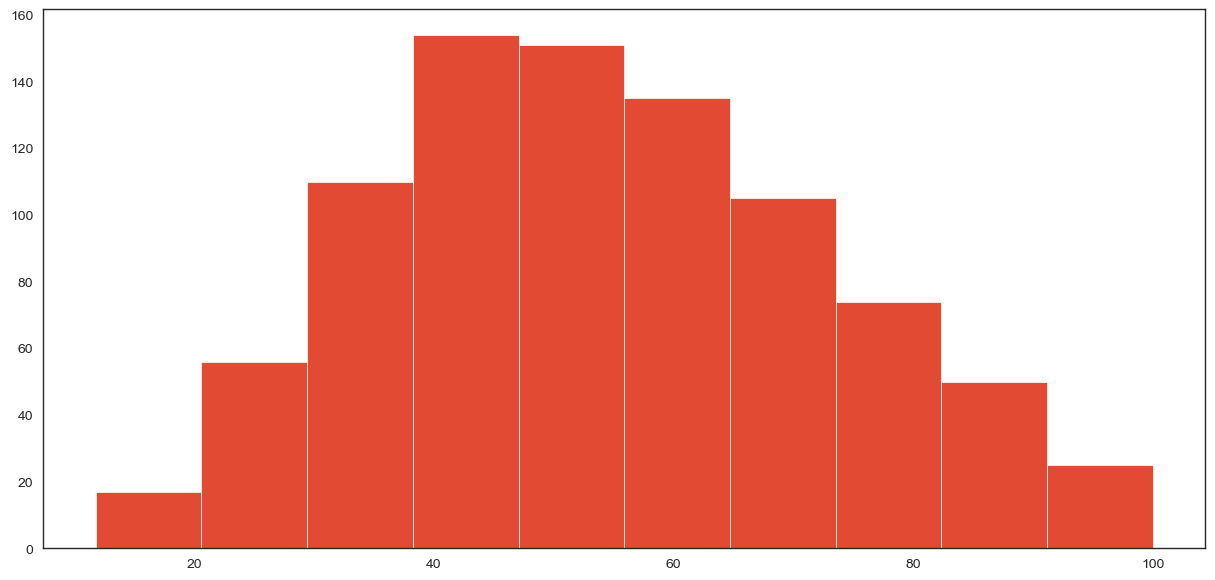

In [66]:
plt.hist(model_1_df['2013_6_year_pell_grad_rate'])

(array([230., 467., 180.]),
 array([ 11.8,  41.2,  70.6, 100. ]),
 <BarContainer object of 3 artists>)

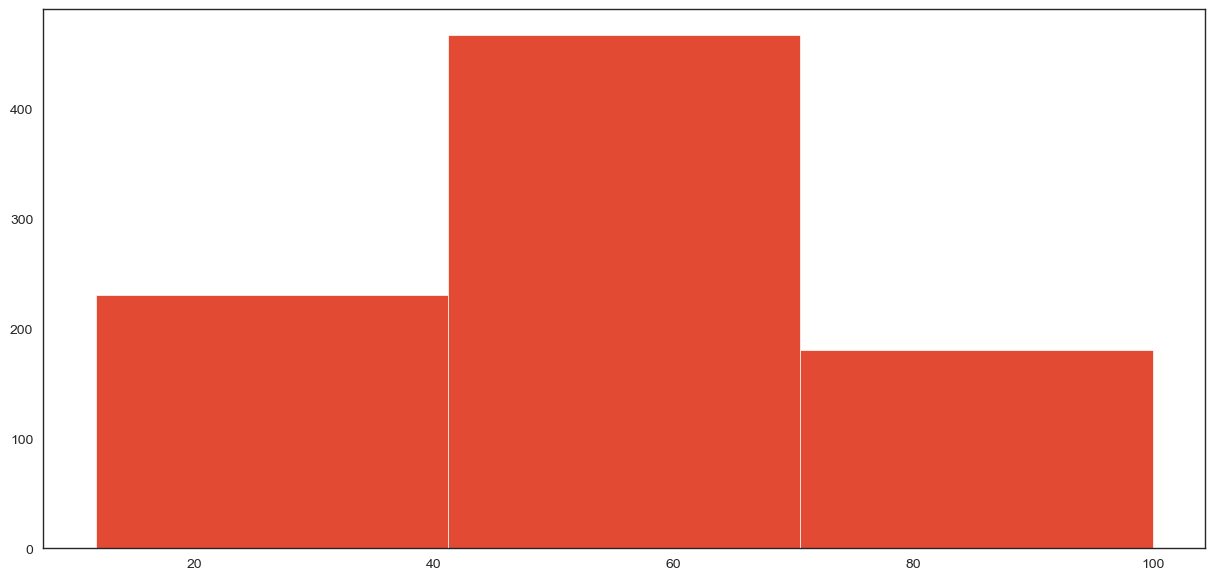

In [67]:
plt.hist(model_1_df['2013_6_year_pell_grad_rate'], bins=3)

In [68]:
# Bin the data on the '2013_6_year_pell_grad_rate' column
bins = [0, 50, 100]
labels = ['less_than_50', 'greater_than_or_equal_to_50']
model_1_df['binned_2013_6_year_pell_grad_rate'] = pd.cut(model_1_df['2013_6_year_pell_grad_rate'], bins=bins, labels=labels)

# Drop the '2013_6_year_pell_grad_rate' column
model_1_df = model_1_df.drop('2013_6_year_pell_grad_rate', axis=1)

# Print the resulting DataFrame
model_1_df.head()

state  sector  admssn   applcn  number_of_undergraduates  \
0    CA  Public  3304.0   5745.0                      4736   
1    FL  Public  6246.0   9199.0                     12230   
2    CA  Public  5364.0  10263.0                      5185   
3    CA  Public  4055.0   9937.0                      9929   
4    FL  Public   715.0   1272.0                       832   

   percent_pell_recipients_among_undergraduates  \
0                                          39.6   
1                                          34.7   
2                                          47.6   
3                                          43.1   
4                                          28.6   

   net_price_for_low_income_students  total_pell_dollars_received_2012_13  \
0                              10665                              8531522   
1                              10778                             17619384   
2                               5334                             11748041   
3                               8427                             18153065   
4                               7007                              1060041   

  binned_2013_6_year_pell_grad_rate  
0                      less_than_50  
1                      less_than_50  
2                      less_than_50  
3                      less_than_50  
4       greater_than_or_equal_to_50

## 4.2 Split Data

In [69]:
X = model_1_df.drop(['binned_2013_6_year_pell_grad_rate'], axis=1)
y = model_1_df["binned_2013_6_year_pell_grad_rate"]

In [70]:
y

0                     less_than_50
1                     less_than_50
2                     less_than_50
3                     less_than_50
4      greater_than_or_equal_to_50
                  ...             
872    greater_than_or_equal_to_50
873                   less_than_50
874    greater_than_or_equal_to_50
875                   less_than_50
876    greater_than_or_equal_to_50
Name: binned_2013_6_year_pell_grad_rate, Length: 877, dtype: category
Categories (2, object): ['less_than_50' < 'greater_than_or_equal_to_50']

In [71]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 877 entries, 0 to 876
Series name: binned_2013_6_year_pell_grad_rate
Non-Null Count  Dtype   
--------------  -----   
877 non-null    category
dtypes: category(1)
memory usage: 1.1 KB


In [72]:
X = pd.get_dummies(X)
X

admssn   applcn  number_of_undergraduates  \
0     3304.0   5745.0                      4736   
1     6246.0   9199.0                     12230   
2     5364.0  10263.0                      5185   
3     4055.0   9937.0                      9929   
4      715.0   1272.0                       832   
..       ...      ...                       ...   
872   1375.0   7984.0                      2516   
873   3235.0   5413.0                     13103   
874  11107.0  29194.0                     31125   
875    667.0   1090.0                       551   
876   2411.0   3665.0                      1885   

     percent_pell_recipients_among_undergraduates  \
0                                            39.6   
1                                            34.7   
2                                            47.6   
3                                            43.1   
4                                            28.6   
..                                            ...   
872                                          11.0   
873                                          27.8   
874                                          41.3   
875                                          53.4   
876                                          21.8   

     net_price_for_low_income_students  total_pell_dollars_received_2012_13  \
0                                10665                              8531522   
1                                10778                             17619384   
2                                 5334                             11748041   
3                                 8427                             18153065   
4                                 7007                              1060041   
..                                 ...                                  ...   
872                               7357                              1279762   
873                               9870                             14829461   
874                               6688                             65008116   
875                              18464                              4140336   
876                              18683                              2112120   

     state_AL  state_AR  state_AZ  state_CA  ...  state_TX  state_UT  \
0           0         0         0         1  ...         0         0   
1           0         0         0         0  ...         0         0   
2           0         0         0         1  ...         0         0   
3           0         0         0         1  ...         0         0   
4           0         0         0         0  ...         0         0   
..        ...       ...       ...       ...  ...       ...       ...   
872         0         0         0         0  ...         0         0   
873         0         0         0         0  ...         0         0   
874         0         0         0         0  ...         0         0   
875         0         0         0         0  ...         0         0   
876         0         0         0         0  ...         0         0   

     state_VA  state_VT  state_WA  state_WI  state_WV  state_WY  \
0           0         0         0         0         0         0   
1           0         0         0         0         0         0   
2           0         0         0         0         0         0   
3           0         0         0         0         0         0   
4           0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...   
872         0         1         0         0         0         0   
873         0         0         0         0         0         0   
874         0         0         0         0         0         0   
875         0         0         0         0         0         0   
876         0         0         0         0         0         0   

     sector_Private Nonprofit  sector_Public  
0                           0              1  
1                           0              

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [74]:
from sklearn.preprocessing import LabelEncoder

# Convert labels in y to binary integers
le = LabelEncoder()
y = le.fit_transform(y)

In [75]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [76]:
print('The Shape Of The Original Data: ', model_1_df.shape)
print('The Shape Of x_test: ', x_test.shape)
print('The Shape Of x_train: ', x_train.shape)
print('The Shape Of y_test: ', y_test.shape)
print('The Shape Of y_train: ', y_train.shape)

The Shape Of The Original Data:  (877, 9)
The Shape Of x_test:  (290, 58)
The Shape Of x_train:  (587, 58)
The Shape Of y_test:  (290,)
The Shape Of y_train:  (587,)


# 5. Logistic Regression Models

## 5.1 Unbalanced Logistic Regression Model

/Users/jeremysloan/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/jeremysloan/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/jeremysloan/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/jeremysloan/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/jeremysloan/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/jeremysloan/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed

Best Unbalanced Logistic Regression Model Hyperparameters: {'C': 0.1, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       175
           1       0.75      0.80      0.77       115

    accuracy                           0.81       290
   macro avg       0.81      0.81      0.81       290
weighted avg       0.82      0.81      0.81       290



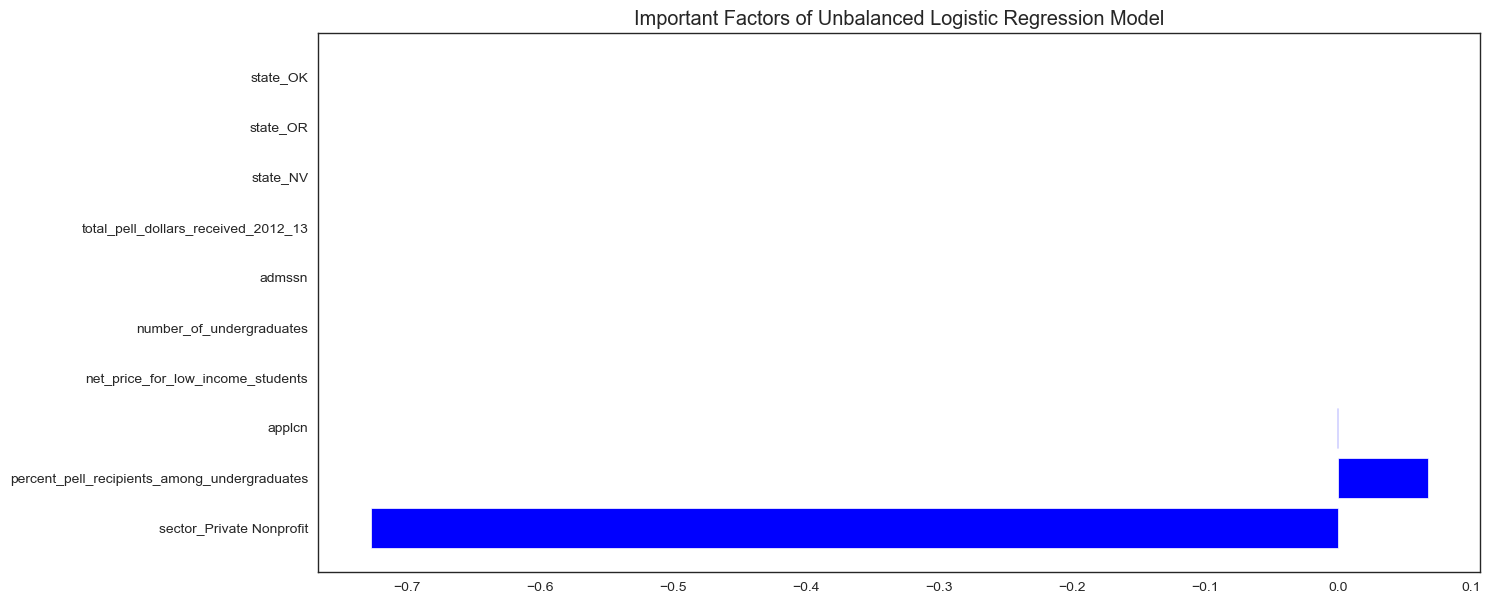

In [77]:
# Define the hyperparameter grid to search over
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear'],
    'max_iter': [1000]
}

# Perform hyperparameter tuning using GridSearchCV
lgr = LogisticRegression(random_state=42)
grid_search = GridSearchCV(lgr, param_grid, cv=5)
grid_search.fit(x_train, y_train)
print('Best Unbalanced Logistic Regression Model Hyperparameters:', grid_search.best_params_)

# Fit the logistic regression model using the best hyperparameters
lgr = LogisticRegression(**grid_search.best_params_, random_state=42)
lgr.fit(x_train, y_train)

# Make predictions on the test set
y_pred = lgr.predict(x_test)

# Print classification report to evaluate model performance
print(classification_report(y_test, y_pred))

# Visualize important factors of the logistic regression model
coef_df = pd.DataFrame({'feature': x_train.columns, 'coef': lgr.coef_[0]})
coef_df['abs_coef'] = coef_df['coef'].abs()
coef_df = coef_df.sort_values(by='abs_coef', ascending=False).head(10)
plt.barh(y=coef_df['feature'], width=coef_df['coef'], color='b')
plt.title('Important Factors of Unbalanced Logistic Regression Model')
plt.show()

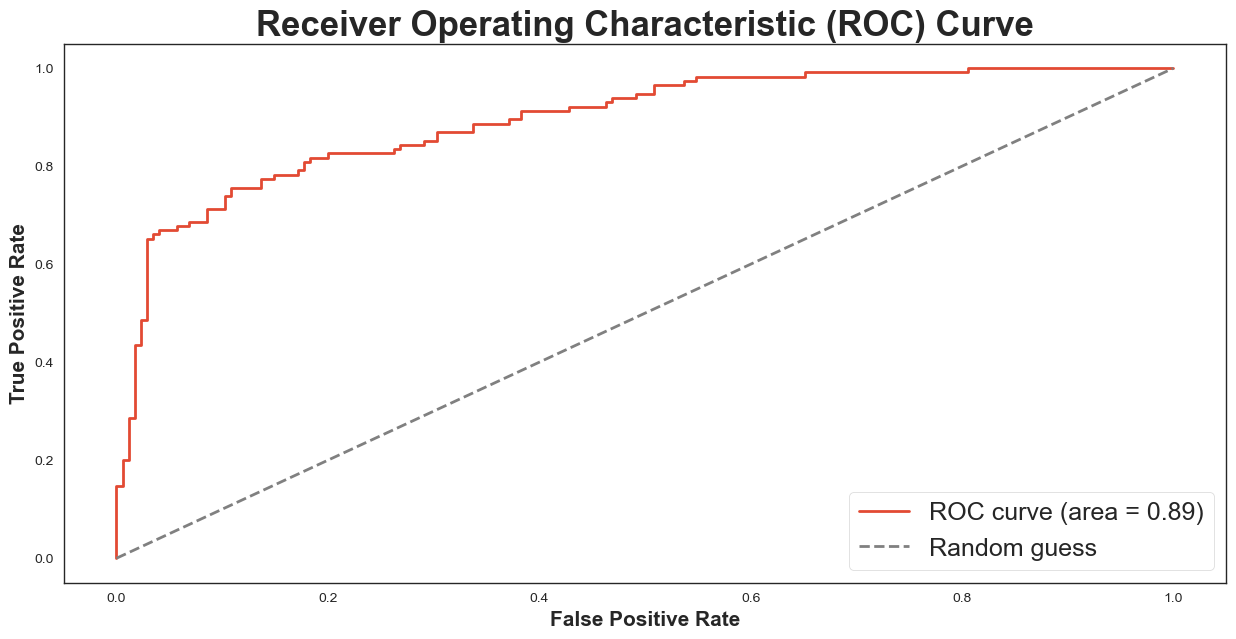

In [78]:
from sklearn.metrics import roc_curve, auc

# Compute the predicted probabilities of the positive class
y_pred_prob = lgr.predict_proba(x_test)[:, 1]

# Compute the false positive rate and true positive rate for various thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='gray', label='Random guess')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontweight = 'bold', fontsize = 15)
plt.ylabel('True Positive Rate', fontweight = 'bold', fontsize = 15)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontweight = 'bold', fontsize = 25)
plt.legend(loc="lower right",  prop={'size': 18})
plt.show()


In [79]:
# Fit a baseline model using default hyperparameters
lgr_baseline = LogisticRegression(random_state=42)
lgr_baseline.fit(x_train, y_train)

# Make predictions on the test set using the baseline model
y_pred_baseline = lgr_baseline.predict(x_test)

# Print classification report to compare baseline model to tuned model
print('Unbalanced Baseline model:')
print(classification_report(y_test, y_pred_baseline))
print('Unbalanced Tuned model:')
print(classification_report(y_test, y_pred))

Unbalanced Baseline model:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       175
           1       0.69      0.70      0.70       115

    accuracy                           0.76       290
   macro avg       0.75      0.75      0.75       290
weighted avg       0.76      0.76      0.76       290

Unbalanced Tuned model:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       175
           1       0.75      0.80      0.77       115

    accuracy                           0.81       290
   macro avg       0.81      0.81      0.81       290
weighted avg       0.82      0.81      0.81       290



## 5.2 Balanced Logistic Regression Model

### 5.2.1 Balance the Training Set Using the SMOTE Technique

SMOTE or Synthetic Minority Oversampling Technique is an oversampling technique but SMOTE working differently than your typical oversampling.

In a classic oversampling technique, the minority data is duplicated from the minority data population. While it increases the number of data, it does not give any new information or variation to the machine learning model.

SMOTE works by utilizing a k-nearest neighbor algorithm to create synthetic data. SMOTE first start by choosing random data from the minority class, then k-nearest neighbors from the data are set. Synthetic data would then be made between the random data and the randomly selected k-nearest neighbor.


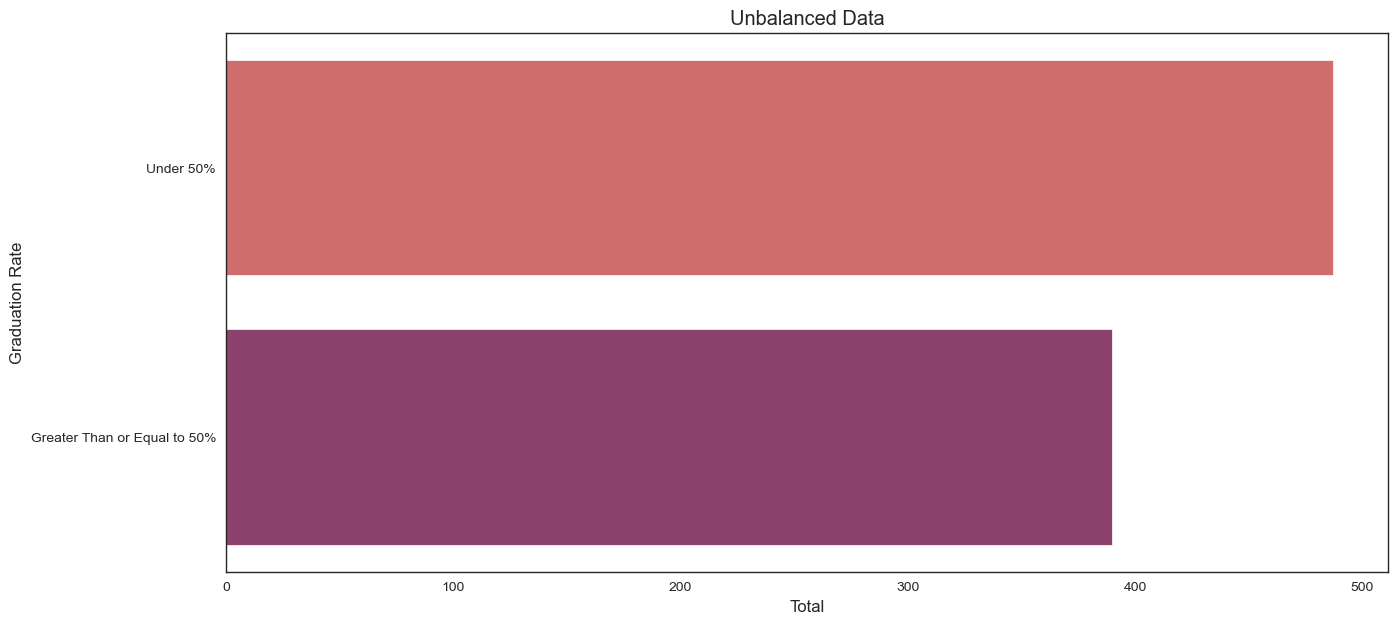

In [80]:
#sns.set_theme(style="darkgrid")
sns.countplot(y=y, data=model_1_df, palette="flare")
plt.ylabel('Graduation Rate')
plt.xlabel('Total')
plt.yticks([0,1], ['Under 50%','Greater Than or Equal to 50%'])
plt.title('Unbalanced Data')
plt.show()

In [81]:
model_1_df['binned_2013_6_year_pell_grad_rate'].value_counts()

greater_than_or_equal_to_50    487
less_than_50                   390
Name: binned_2013_6_year_pell_grad_rate, dtype: int64

- 199 schools with a low graduation rate
- 229 schools with a low graduation rate
- 506 schools with a low graduation rate

In [82]:
# Over Sample using SMOTE
from imblearn.over_sampling import SMOTE

#X, y = SMOTE(k_neighbors=1).fit_resample(X, y)

# Use SMOTE to balance the training set
smote = SMOTE(random_state=42)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)

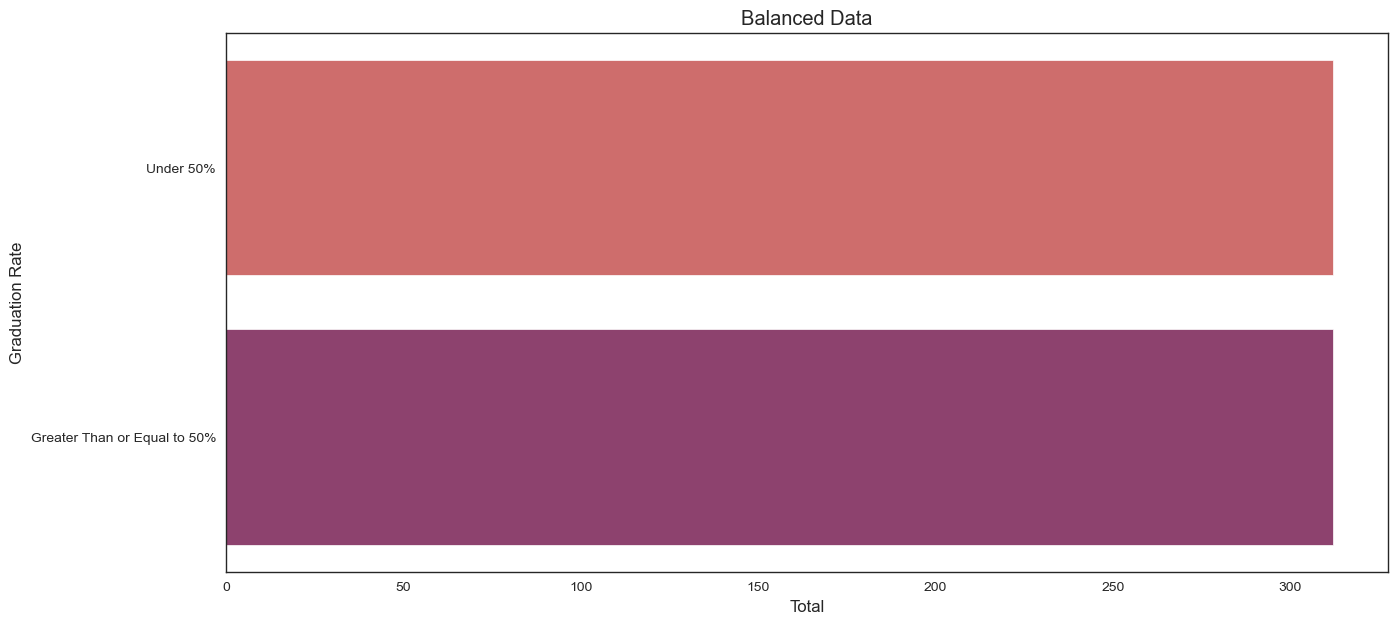

In [83]:
#sns.set_theme(style="darkgrid")
sns.countplot(y=y_train_balanced, data=model_1_df, palette="flare")
plt.ylabel('Graduation Rate')
plt.xlabel('Total')
plt.yticks([0,1], ['Under 50%','Greater Than or Equal to 50%'])
plt.title('Balanced Data')
plt.show()

### 5.2.2 Fit the Balanced Logistic Regression Model

Best Balanced Logistic Regression Model Hyperparameters: {'C': 0.1, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       175
           1       0.73      0.82      0.77       115

    accuracy                           0.81       290
   macro avg       0.80      0.81      0.81       290
weighted avg       0.82      0.81      0.81       290



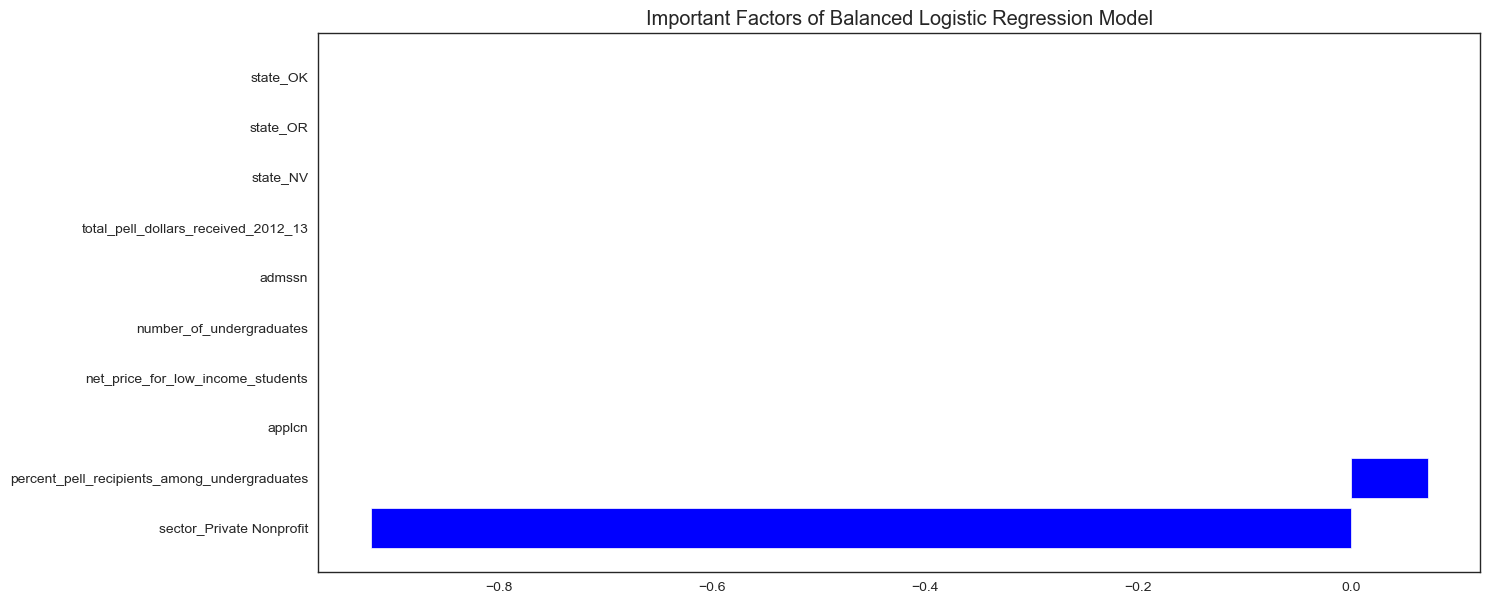

In [84]:
# Define the hyperparameter grid to search over
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear'],
    'max_iter': [1000]
}

# Perform hyperparameter tuning using GridSearchCV
lgr = LogisticRegression(random_state=42)
grid_search = GridSearchCV(lgr, param_grid, cv=5)
grid_search.fit(x_train_balanced, y_train_balanced)
print('Best Balanced Logistic Regression Model Hyperparameters:', grid_search.best_params_)

# Fit the logistic regression model using the best hyperparameters
lgr = LogisticRegression(**grid_search.best_params_, random_state=42)
lgr.fit(x_train_balanced, y_train_balanced)

# Make predictions on the test set
y_pred = lgr.predict(x_test)

# Print classification report to evaluate model performance
print(classification_report(y_test, y_pred))

# Visualize important factors of the logistic regression model
coef_df = pd.DataFrame({'feature': x_train.columns, 'coef': lgr.coef_[0]})
coef_df['abs_coef'] = coef_df['coef'].abs()
coef_df = coef_df.sort_values(by='abs_coef', ascending=False).head(10)
plt.barh(y=coef_df['feature'], width=coef_df['coef'], color='b')
plt.title('Important Factors of Balanced Logistic Regression Model')
plt.show()

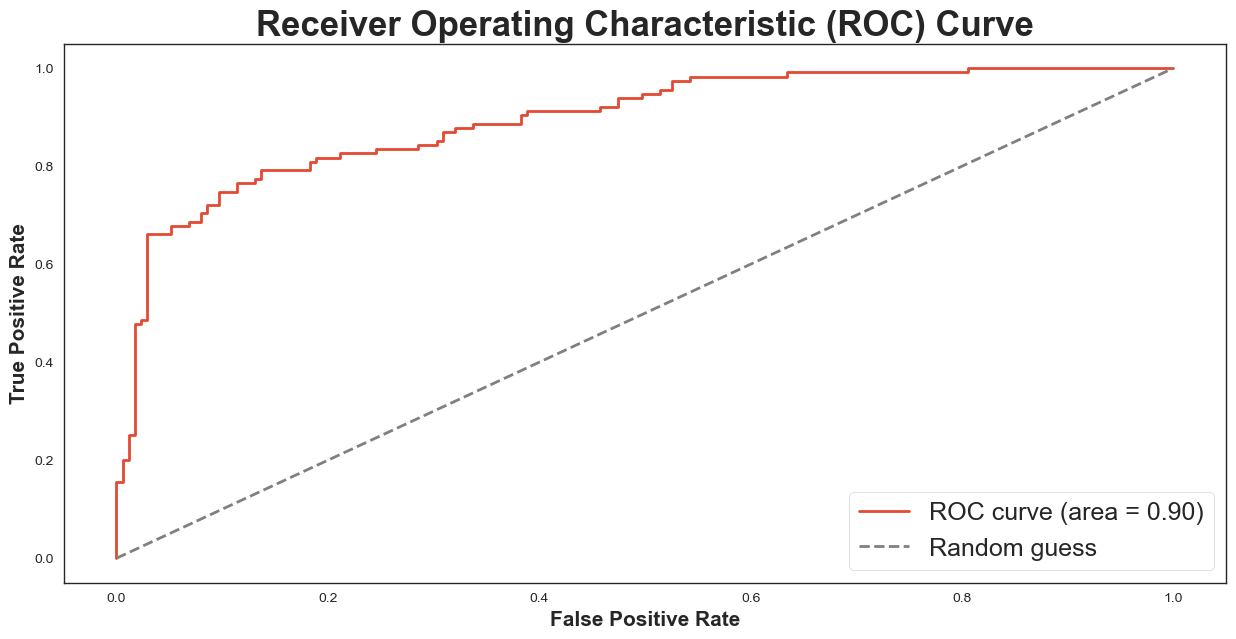

In [85]:
# Compute the predicted probabilities of the positive class
y_pred_prob = lgr.predict_proba(x_test)[:, 1]

# Compute the false positive rate and true positive rate for various thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='gray', label='Random guess')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontweight = 'bold', fontsize = 15)
plt.ylabel('True Positive Rate', fontweight = 'bold', fontsize = 15)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontweight = 'bold', fontsize = 25)
plt.legend(loc="lower right",  prop={'size': 18})
plt.show()

In [86]:
# Fit a baseline model using default hyperparameters
lgr_baseline = LogisticRegression(random_state=42)
lgr_baseline.fit(x_train_balanced, y_train_balanced)

# Make predictions on the test set using the baseline model
y_pred_baseline = lgr_baseline.predict(x_test)

# Print classification report to compare baseline model to tuned model
print('Balanced Baseline model:')
print(classification_report(y_test, y_pred_baseline))
print('Balanced Tuned model:')
print(classification_report(y_test, y_pred))

Balanced Baseline model:
              precision    recall  f1-score   support

           0       0.84      0.75      0.80       175
           1       0.68      0.78      0.73       115

    accuracy                           0.77       290
   macro avg       0.76      0.77      0.76       290
weighted avg       0.78      0.77      0.77       290

Balanced Tuned model:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       175
           1       0.73      0.82      0.77       115

    accuracy                           0.81       290
   macro avg       0.80      0.81      0.81       290
weighted avg       0.82      0.81      0.81       290



---
---
---

### 5.3 Balanced Linear Regression Model

Coefficients:  [-2.68555571e-05 -3.53302735e-06  1.24005640e-06  1.68773838e-02
  5.09141774e-06  1.32060528e-09  2.66399325e-01  3.35181910e-02
  2.88341415e-01 -2.28690864e-01  2.33066068e-02  2.67942799e-01
 -7.18152206e-02 -1.35859379e-12 -8.13697783e-02 -2.31743357e-01
  2.05637886e-02 -1.56263702e-01 -1.12573355e-01 -1.95142137e-01
 -2.88748658e-03  1.92451133e-01  2.09664281e-01  2.04413990e-01
 -7.33700956e-02 -8.89416642e-02 -3.88300639e-03 -6.34562531e-02
 -8.80755732e-02  1.33730918e-01  5.25306360e-03  1.94007190e-01
 -1.40120340e-01  1.77966881e-01  8.42116136e-04 -1.76584543e-02
 -1.93073240e-01  5.55111512e-17  4.00035808e-01 -1.70526532e-01
 -1.27057960e-01 -3.57207663e-02 -3.78328573e-01 -1.22890452e-01
  3.02001002e-01  5.66647217e-02  1.68919545e-01 -1.24355388e-02
  6.83296586e-02 -1.99540142e-01  2.26713122e-02 -1.31929158e-02
 -2.21883819e-01 -6.39521940e-02  5.75696765e-02  0.00000000e+00
 -1.11404727e-01  1.11404727e-01]
Intercept:  0.01341261341798139
Mean squa

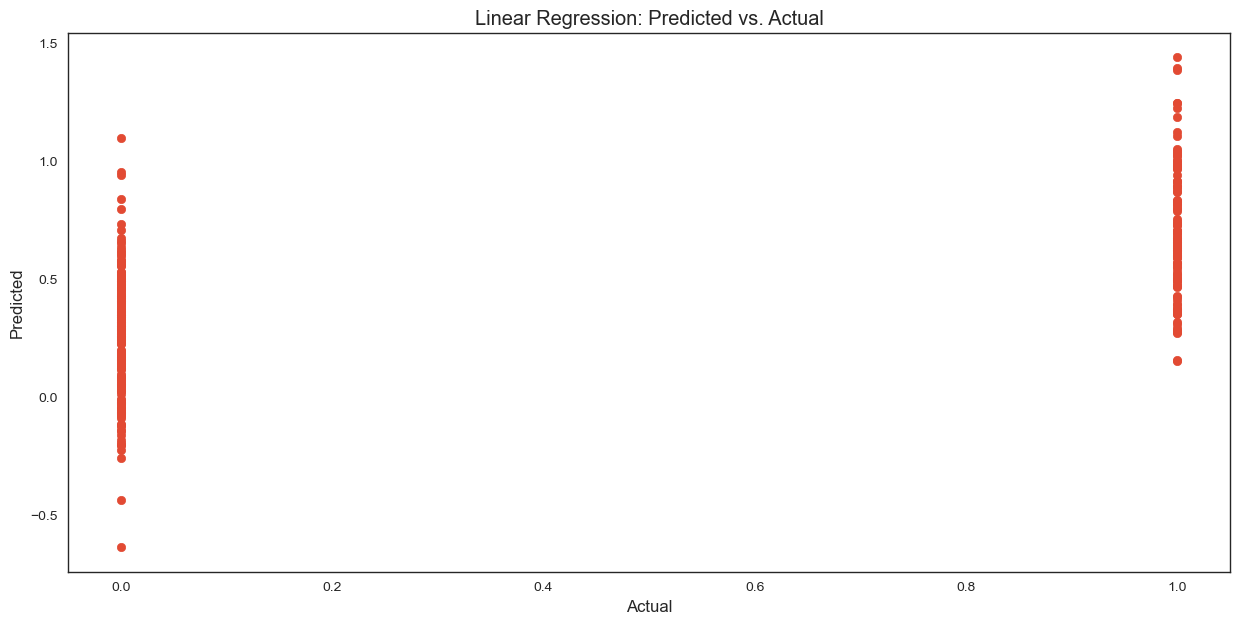

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Create linear regression object
lr = LinearRegression()

# Fit the model using the training data
lr.fit(x_train, y_train)

# Make predictions on the test set
y_pred = lr.predict(x_test)

# Print the coefficients and intercept
print("Coefficients: ", lr.coef_)
print("Intercept: ", lr.intercept_)

# Print mean squared error and R-squared on the test set
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error: %.2f" % mse)
print("R-squared: %.2f" % r2)

# Plot the predicted vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression: Predicted vs. Actual")
plt.show()

# 6. Decision Tree Models

## 6.1 Balanced Decision Tree Model

Best Balanced Decision Tree Model Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.88      0.74      0.80       175
           1       0.68      0.84      0.75       115

    accuracy                           0.78       290
   macro avg       0.78      0.79      0.78       290
weighted avg       0.80      0.78      0.78       290



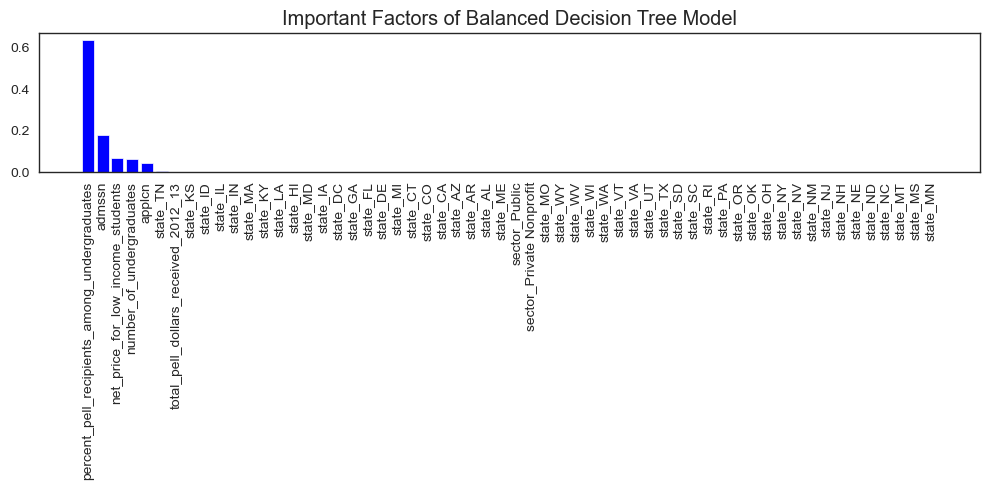

Balanced Decision Tree Baseline model:
              precision    recall  f1-score   support

           0       0.83      0.73      0.77       175
           1       0.65      0.77      0.71       115

    accuracy                           0.74       290
   macro avg       0.74      0.75      0.74       290
weighted avg       0.76      0.74      0.75       290

Balanced Decision Tree Tuned model:
              precision    recall  f1-score   support

           0       0.88      0.74      0.80       175
           1       0.68      0.84      0.75       115

    accuracy                           0.78       290
   macro avg       0.78      0.79      0.78       290
weighted avg       0.80      0.78      0.78       290



In [88]:
from sklearn.tree import DecisionTreeClassifier
#from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import classification_report
#import matplotlib.pyplot as plt

# Define the hyperparameter grid to search over
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Perform hyperparameter tuning using GridSearchCV
dtc = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dtc, param_grid, cv=5)
grid_search.fit(x_train_balanced, y_train_balanced)
print('Best Balanced Decision Tree Model Hyperparameters:', grid_search.best_params_)

# Fit the decision tree model using the best hyperparameters
dtc = DecisionTreeClassifier(**grid_search.best_params_, random_state=42)
dtc.fit(x_train_balanced, y_train_balanced)

# Make predictions on the test set
y_pred = dtc.predict(x_test)

# Print classification report to evaluate model performance
print(classification_report(y_test, y_pred))

# Visualize important factors of the decision tree model
importances = dtc.feature_importances_
indices = np.argsort(importances)[::-1]
features = x_train.columns

plt.figure(figsize=(10,5))
plt.title('Important Factors of Balanced Decision Tree Model')
plt.bar(range(len(indices)), importances[indices], color='b')
plt.xticks(range(len(indices)), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

# Fit a baseline model using default hyperparameters
dtc_baseline = DecisionTreeClassifier(random_state=42)
dtc_baseline.fit(x_train_balanced, y_train_balanced)

# Make predictions on the test set using the baseline model
y_pred_baseline = dtc_baseline.predict(x_test)

# Print classification report to compare baseline model to tuned model
print('Balanced Decision Tree Baseline model:')
print(classification_report(y_test, y_pred_baseline))
print('Balanced Decision Tree Tuned model:')
print(classification_report(y_test, y_pred))


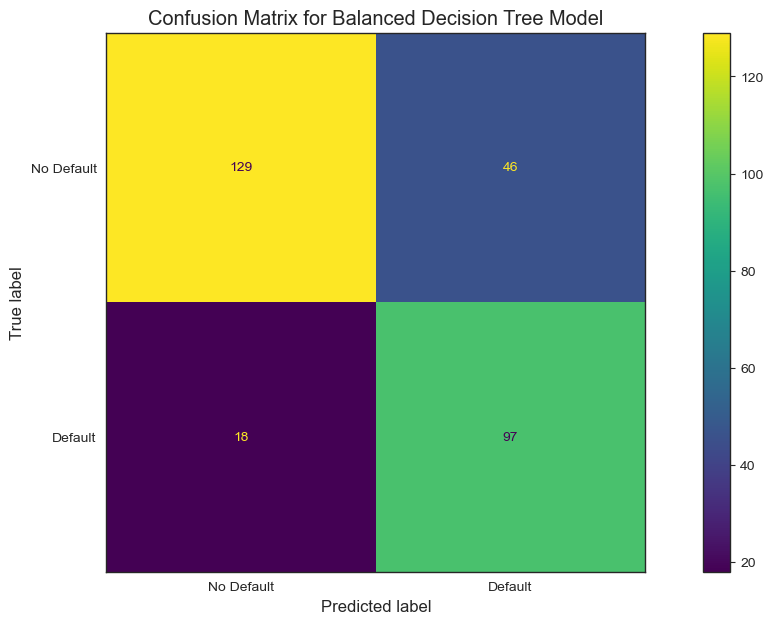

In [89]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Compute confusion matrix for the balanced decision tree model
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using ConfusionMatrixDisplay
cmd = ConfusionMatrixDisplay(cm, display_labels=['No Default', 'Default'])
cmd.plot()
plt.title('Confusion Matrix for Balanced Decision Tree Model')
plt.show()


## 6.2  Unbalanced Decision Tree Model

Best Unbalanced Decision Tree Model Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.86      0.71      0.78       175
           1       0.66      0.83      0.73       115

    accuracy                           0.76       290
   macro avg       0.76      0.77      0.76       290
weighted avg       0.78      0.76      0.76       290



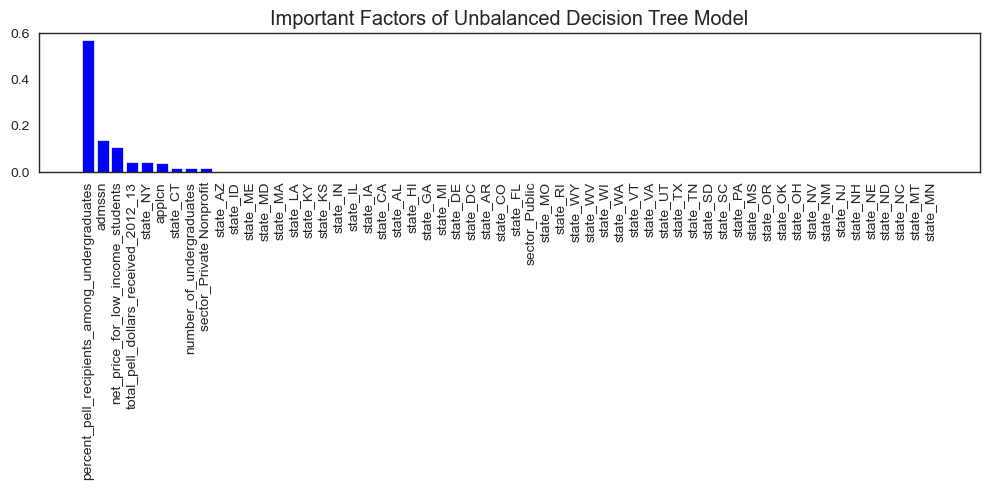

Unbalanced Decision Tree Baseline model:
              precision    recall  f1-score   support

           0       0.84      0.75      0.79       175
           1       0.67      0.78      0.72       115

    accuracy                           0.76       290
   macro avg       0.76      0.77      0.76       290
weighted avg       0.77      0.76      0.76       290

Unbalanced Decision Tree Tuned model:
              precision    recall  f1-score   support

           0       0.86      0.71      0.78       175
           1       0.66      0.83      0.73       115

    accuracy                           0.76       290
   macro avg       0.76      0.77      0.76       290
weighted avg       0.78      0.76      0.76       290



In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Define the hyperparameter grid to search over
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Perform hyperparameter tuning using GridSearchCV
dtc = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dtc, param_grid, cv=5)
grid_search.fit(x_train, y_train)
print('Best Unbalanced Decision Tree Model Hyperparameters:', grid_search.best_params_)

# Fit the decision tree model using the best hyperparameters
dtc = DecisionTreeClassifier(**grid_search.best_params_, random_state=42)
dtc.fit(x_train, y_train)

# Make predictions on the test set
y_pred = dtc.predict(x_test)

# Print classification report to evaluate model performance
print(classification_report(y_test, y_pred))

# Visualize important factors of the decision tree model
importances = dtc.feature_importances_
indices = np.argsort(importances)[::-1]
features = x_train.columns

plt.figure(figsize=(10,5))
plt.title('Important Factors of Unbalanced Decision Tree Model')
plt.bar(range(len(indices)), importances[indices], color='b')
plt.xticks(range(len(indices)), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

# Fit a baseline model using default hyperparameters
dtc_baseline = DecisionTreeClassifier(random_state=42)
dtc_baseline.fit(x_train, y_train)

# Make predictions on the test set using the baseline model
y_pred_baseline = dtc_baseline.predict(x_test)

# Print classification report to compare baseline model to tuned model
print('Unbalanced Decision Tree Baseline model:')
print(classification_report(y_test, y_pred_baseline))
print('Unbalanced Decision Tree Tuned model:')
print(classification_report(y_test, y_pred))


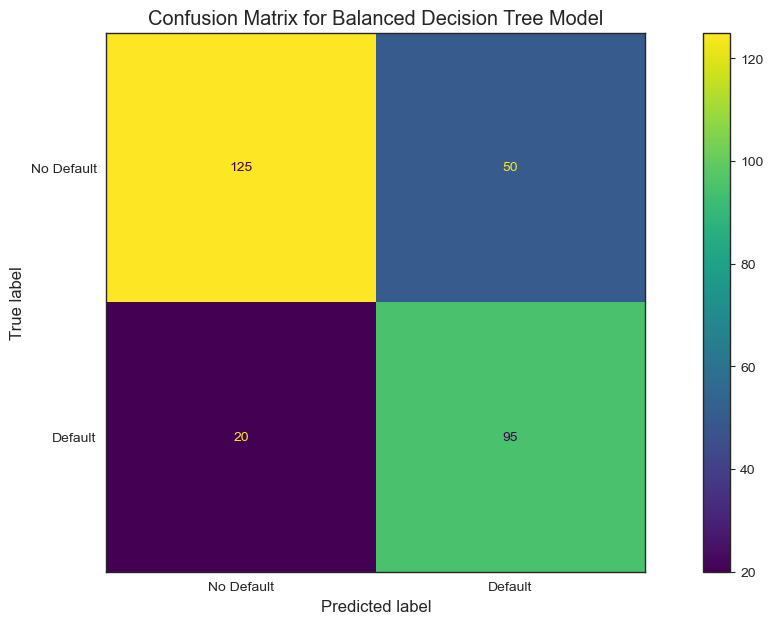

In [91]:
# Compute confusion matrix for the balanced decision tree model
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using ConfusionMatrixDisplay
cmd = ConfusionMatrixDisplay(cm, display_labels=['No Default', 'Default'])
cmd.plot()
plt.title('Confusion Matrix for Balanced Decision Tree Model')
plt.show()

---
---
---

# 7. Linear Regression Models

In [92]:
interesting_columns2 = ['sector',  'admssn', 'applcn', 'number_of_undergraduates', 'number_of_undergraduates_recieving_pell_grants', 
                        'net_price_for_low_income_students', 'avg_pell_grant_per_student', '2013_6_year_pell_grad_rate']

In [93]:
model_2_df = ThePellPartnership[interesting_columns2]
model_2_df

sector   admssn   applcn  number_of_undergraduates  \
0               Public   3304.0   5745.0                      4736   
1               Public   6246.0   9199.0                     12230   
2               Public   5364.0  10263.0                      5185   
3               Public   4055.0   9937.0                      9929   
4               Public    715.0   1272.0                       832   
..                 ...      ...      ...                       ...   
872  Private Nonprofit   1375.0   7984.0                      2516   
873             Public   3235.0   5413.0                     13103   
874             Public  11107.0  29194.0                     31125   
875  Private Nonprofit    667.0   1090.0                       551   
876  Private Nonprofit   2411.0   3665.0                      1885   

     number_of_undergraduates_recieving_pell_grants  \
0                                            1875.0   
1                                            4244.0   
2                                            2468.0   
3                                            4279.0   
4                                             238.0   
..                                              ...   
872                                           277.0   
873                                          3643.0   
874                                         12855.0   
875                                           294.0   
876                                           411.0   

     net_price_for_low_income_students  avg_pell_grant_per_student  \
0                                10665                     4550.15   
1                                10778                     4151.60   
2                                 5334                     4760.15   
3                                 8427                     4242.36   
4                                 7007                     4453.95   
..                                 ...                         ...   
872                               7357                     4620.08   
873                               9870                     4070.67   
874                               6688                     5057.03   
875                              18464                    14082.78   
876                              18683                     5138.98   

     2013_6_year_pell_grad_rate  
0                          47.6  
1                          45.0  
2                          41.4  
3                          40.7  
4                          65.5  
..                          ...  
872                        88.7  
873                        41.2  
874                        61.5  
875                        26.5  
876                        66.7  

[877 rows x 8 columns]

In [94]:
X = model_2_df.drop(['2013_6_year_pell_grad_rate'], axis=1)
y = model_2_df["2013_6_year_pell_grad_rate"]

In [95]:
X = pd.get_dummies(X)

# Drop dummy variable for multicollinearity
X = X.drop(['sector_Private Nonprofit'], axis=1)

X

admssn   applcn  number_of_undergraduates  \
0     3304.0   5745.0                      4736   
1     6246.0   9199.0                     12230   
2     5364.0  10263.0                      5185   
3     4055.0   9937.0                      9929   
4      715.0   1272.0                       832   
..       ...      ...                       ...   
872   1375.0   7984.0                      2516   
873   3235.0   5413.0                     13103   
874  11107.0  29194.0                     31125   
875    667.0   1090.0                       551   
876   2411.0   3665.0                      1885   

     number_of_undergraduates_recieving_pell_grants  \
0                                            1875.0   
1                                            4244.0   
2                                            2468.0   
3                                            4279.0   
4                                             238.0   
..                                              ...   
872                                           277.0   
873                                          3643.0   
874                                         12855.0   
875                                           294.0   
876                                           411.0   

     net_price_for_low_income_students  avg_pell_grant_per_student  \
0                                10665                     4550.15   
1                                10778                     4151.60   
2                                 5334                     4760.15   
3                                 8427                     4242.36   
4                                 7007                     4453.95   
..                                 ...                         ...   
872                               7357                     4620.08   
873                               9870                     4070.67   
874                               6688                     5057.03   
875                              18464                    14082.78   
876                              18683                     5138.98   

     sector_Public  
0                1  
1                1  
2                1  
3                1  
4                1  
..             ...  
872              0  
873              1  
874              1  
875              0  
876              0  

[877 rows x 7 columns]

In [96]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)
print('The Shape Of The Original Data: ', model_2_df.shape)
print('The Shape Of x_test: ', x_test.shape)
print('The Shape Of x_train: ', x_train.shape)
print('The Shape Of y_test: ', y_test.shape)
print('The Shape Of y_train: ', y_train.shape)

The Shape Of The Original Data:  (877, 8)
The Shape Of x_test:  (290, 7)
The Shape Of x_train:  (587, 7)
The Shape Of y_test:  (290,)
The Shape Of y_train:  (587,)


## 7.1 Linear Model Predicting Graduation Rates

Mean squared error: 188.01
Coefficient of determination: 0.46


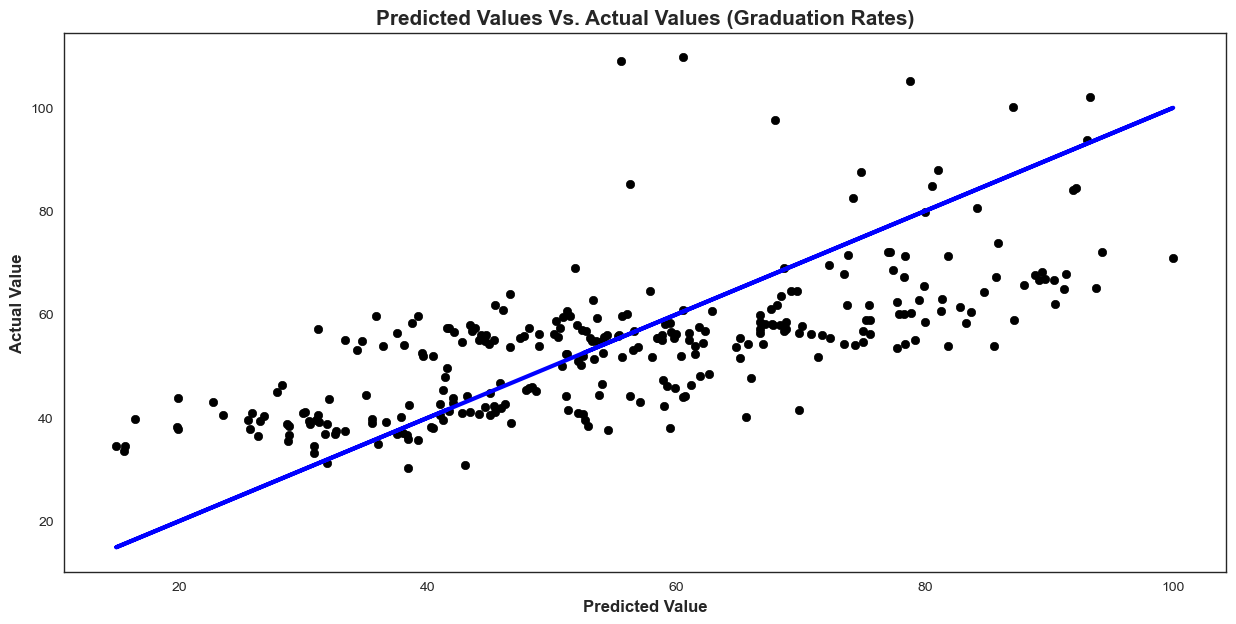

In [97]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# The coefficients
#print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(y_test, y_pred, color="black")
plt.plot(y_test, y_test, color="blue", linewidth=3)
plt.xlabel('Predicted Value', fontweight='bold')
plt.ylabel('Actual Value', fontweight='bold')
plt.title('Predicted Values Vs. Actual Values (Graduation Rates)', fontweight='bold', fontsize=15)

#plt.xticks(())
#plt.yticks(())

plt.show()

In [98]:
import statsmodels.api as sm


# Convert the input data to a statsmodels format
X_sm = sm.add_constant(X)

# Create the model object
model = sm.OLS(y, X_sm)

# Fit the model
results = model.fit()

# Print the model summary
print(results.summary())

                                OLS Regression Results                                
Dep. Variable:     2013_6_year_pell_grad_rate   R-squared:                       0.464
Model:                                    OLS   Adj. R-squared:                  0.459
Method:                         Least Squares   F-statistic:                     107.3
Date:                        Thu, 04 May 2023   Prob (F-statistic):          5.12e-113
Time:                                21:28:39   Log-Likelihood:                -3526.2
No. Observations:                         877   AIC:                             7068.
Df Residuals:                             869   BIC:                             7107.
Df Model:                                   7                                         
Covariance Type:                    nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------

---
***Save Model Summary As HTML Below***

In [99]:
# Print the model summary as HTML
#with open('Grad_Linear_Model_Summary.html', 'w') as f:
#    f.write(results.summary().as_html())

---

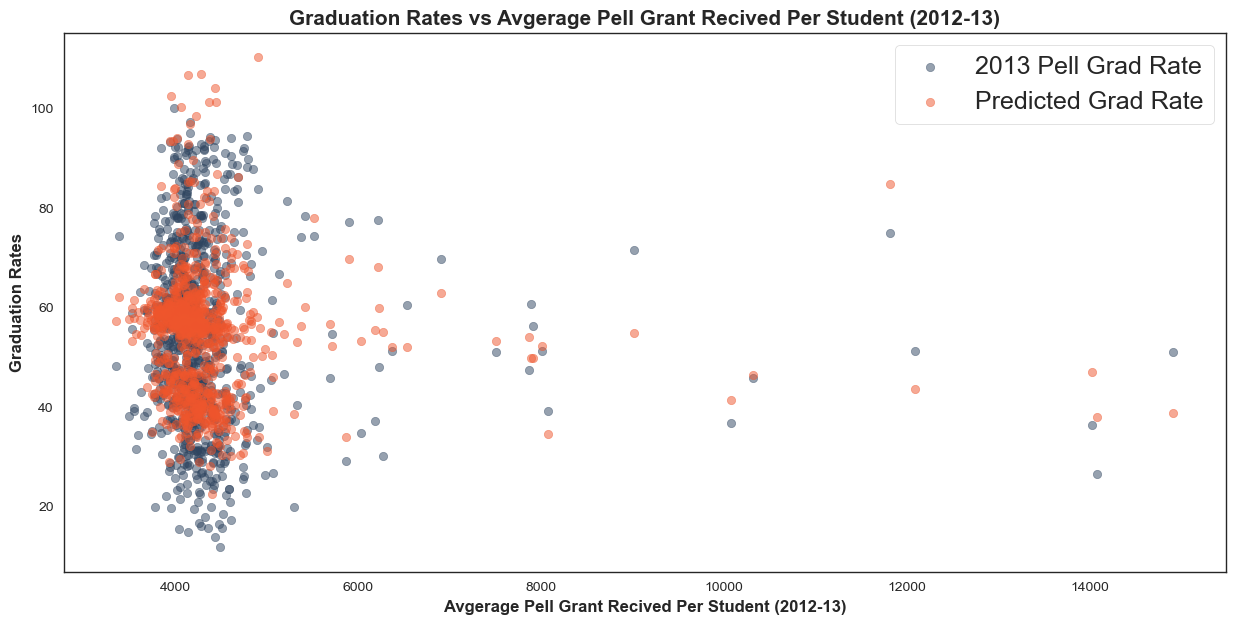

In [100]:
# Get predicted values and confidence intervals
pred_values = results.predict(X_sm)
ci_low, ci_upp = results.conf_int(alpha=0.05)

# Plot data points and regression line
plt.scatter(model_2_df['avg_pell_grant_per_student'], model_2_df['2013_6_year_pell_grad_rate'],
            color='#2f4560', alpha=0.5, label='2013 Pell Grad Rate')
plt.scatter(model_2_df['avg_pell_grant_per_student'], pred_values, color='#ef552c', alpha=0.5, label='Predicted Grad Rate')

# Plot confidence intervals
#plt.fill_between(model_2_df['avg_pell_grant_per_student'], ci_low, ci_upp, color='green', alpha=0.2)

# Set labels and title
plt.xlabel('Avgerage Pell Grant Recived Per Student (2012-13)', fontweight='bold')
plt.ylabel('Graduation Rates', fontweight='bold')
plt.title('Graduation Rates vs Avgerage Pell Grant Recived Per Student (2012-13)', fontweight='bold', fontsize=15)

# Add legend
plt.legend(prop={'size': 18})

plt.show()

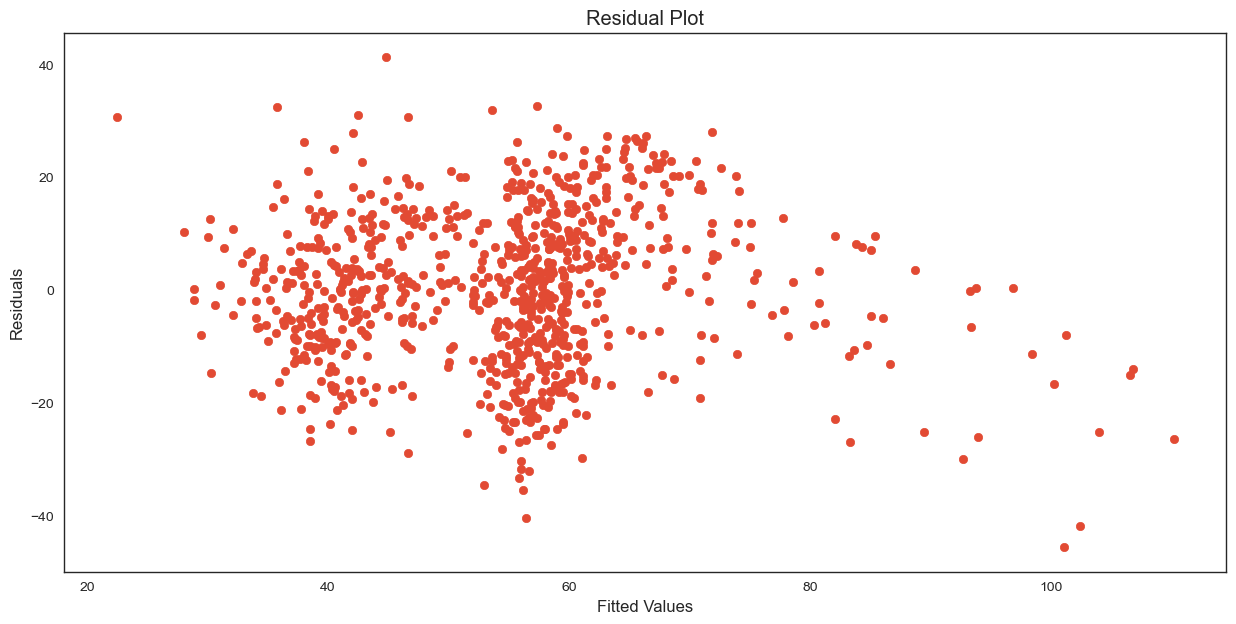

In [101]:
# Create the model object
#model = sm.OLS(y, X_sm)

# Fit the model
#results = model.fit()

# Get the residuals
residuals = results.resid

# Plot the residuals
plt.scatter(results.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

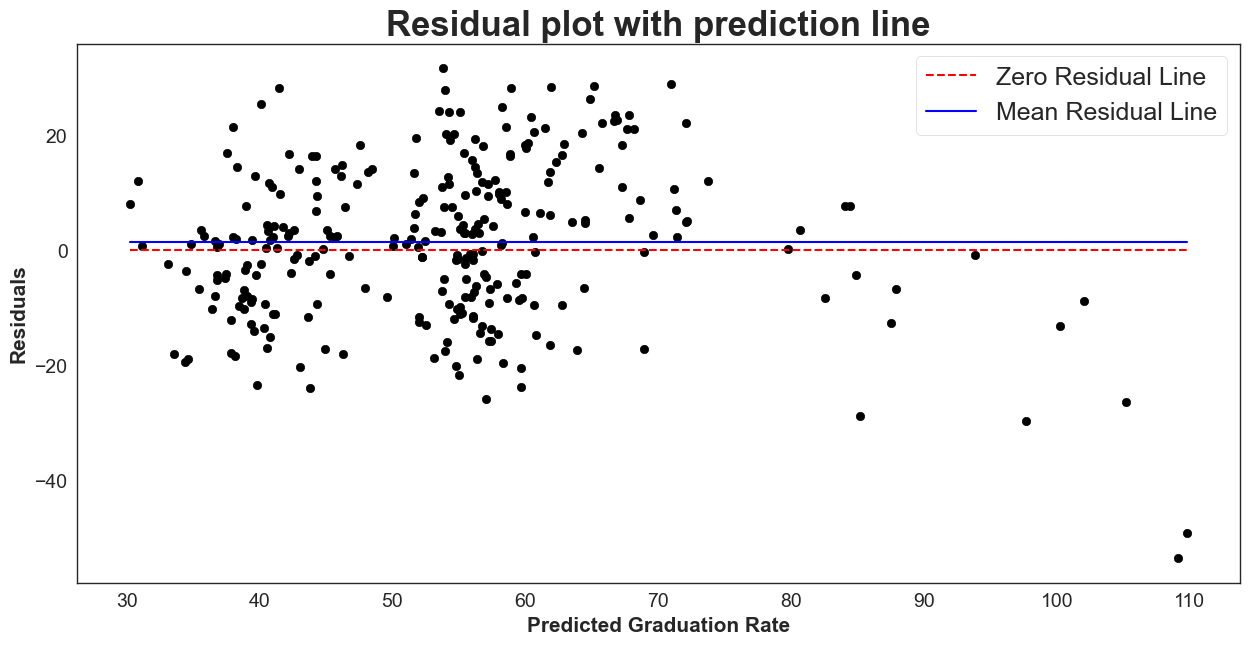

In [102]:
# Generate residual plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='black')
plt.plot([y_pred.min(), y_pred.max()], [0, 0], linestyle='--', color='red', label='Zero Residual Line')
plt.plot([y_pred.min(), y_pred.max()], [residuals.mean(), residuals.mean()], linestyle='-', color='blue', label='Mean Residual Line')

# Plot Formatting
plt.xlabel('Predicted Graduation Rate', fontweight='bold', fontsize=15)
plt.ylabel('Residuals', fontweight='bold', fontsize=15)
plt.title('Residual plot with prediction line', fontweight='bold', fontsize=25)
plt.xticks(fontsize=14) # set the font size of the x axis tick marks
plt.yticks(fontsize=14) # set the font size of the y axis tick marks
plt.legend(prop={'size': 18}) # Add a legend
plt.show()

## 7.2 Linear Model Predicting Admission Rates

This model also uses avg_pell_grant_per_student as opposed to total Pell Grants the school recieved.

In [103]:
interesting_columns2 = ['sector', 'admssn', 'applcn', 'number_of_undergraduates', 'percent_pell_recipients_among_undergraduates', 
                        'net_price_for_low_income_students', 'avg_pell_grant_per_student', 'admssn_rate']

In [104]:
model_2_df = ThePellPartnership[interesting_columns2]
model_2_df

sector   admssn   applcn  number_of_undergraduates  \
0               Public   3304.0   5745.0                      4736   
1               Public   6246.0   9199.0                     12230   
2               Public   5364.0  10263.0                      5185   
3               Public   4055.0   9937.0                      9929   
4               Public    715.0   1272.0                       832   
..                 ...      ...      ...                       ...   
872  Private Nonprofit   1375.0   7984.0                      2516   
873             Public   3235.0   5413.0                     13103   
874             Public  11107.0  29194.0                     31125   
875  Private Nonprofit    667.0   1090.0                       551   
876  Private Nonprofit   2411.0   3665.0                      1885   

     percent_pell_recipients_among_undergraduates  \
0                                            39.6   
1                                            34.7   
2                                            47.6   
3                                            43.1   
4                                            28.6   
..                                            ...   
872                                          11.0   
873                                          27.8   
874                                          41.3   
875                                          53.4   
876                                          21.8   

     net_price_for_low_income_students  avg_pell_grant_per_student  \
0                                10665                     4550.15   
1                                10778                     4151.60   
2                                 5334                     4760.15   
3                                 8427                     4242.36   
4                                 7007                     4453.95   
..                                 ...                         ...   
872                               7357                     4620.08   
873                               9870                     4070.67   
874                               6688                     5057.03   
875                              18464                    14082.78   
876                              18683                     5138.98   

     admssn_rate  
0           57.5  
1           67.9  
2           52.3  
3           40.8  
4           56.2  
..           ...  
872         17.2  
873         59.8  
874         38.0  
875         61.2  
876         65.8  

[877 rows x 8 columns]

In [105]:
X = model_2_df.drop(['admssn_rate'], axis=1)
y = model_2_df["admssn_rate"]

In [106]:
X = pd.get_dummies(X)

# Drop dummy variable for multicollinearity
X = X.drop(['sector_Private Nonprofit'], axis=1)

X

admssn   applcn  number_of_undergraduates  \
0     3304.0   5745.0                      4736   
1     6246.0   9199.0                     12230   
2     5364.0  10263.0                      5185   
3     4055.0   9937.0                      9929   
4      715.0   1272.0                       832   
..       ...      ...                       ...   
872   1375.0   7984.0                      2516   
873   3235.0   5413.0                     13103   
874  11107.0  29194.0                     31125   
875    667.0   1090.0                       551   
876   2411.0   3665.0                      1885   

     percent_pell_recipients_among_undergraduates  \
0                                            39.6   
1                                            34.7   
2                                            47.6   
3                                            43.1   
4                                            28.6   
..                                            ...   
872                                          11.0   
873                                          27.8   
874                                          41.3   
875                                          53.4   
876                                          21.8   

     net_price_for_low_income_students  avg_pell_grant_per_student  \
0                                10665                     4550.15   
1                                10778                     4151.60   
2                                 5334                     4760.15   
3                                 8427                     4242.36   
4                                 7007                     4453.95   
..                                 ...                         ...   
872                               7357                     4620.08   
873                               9870                     4070.67   
874                               6688                     5057.03   
875                              18464                    14082.78   
876                              18683                     5138.98   

     sector_Public  
0                1  
1                1  
2                1  
3                1  
4                1  
..             ...  
872              0  
873              1  
874              1  
875              0  
876              0  

[877 rows x 7 columns]

In [107]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)
print('The Shape Of The Original Data: ', model_2_df.shape)
print('The Shape Of x_test: ', x_test.shape)
print('The Shape Of x_train: ', x_train.shape)
print('The Shape Of y_test: ', y_test.shape)
print('The Shape Of y_train: ', y_train.shape)

The Shape Of The Original Data:  (877, 8)
The Shape Of x_test:  (290, 7)
The Shape Of x_train:  (587, 7)
The Shape Of y_test:  (290,)
The Shape Of y_train:  (587,)


Mean squared error: 131.81
Coefficient of determination: 0.55


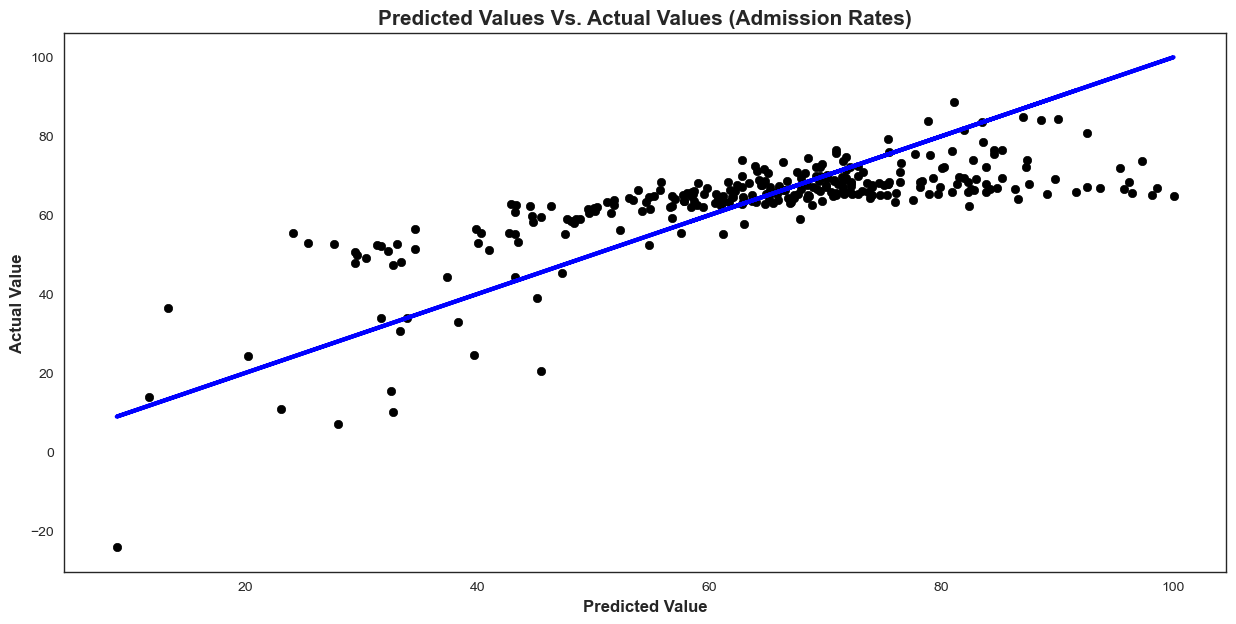

In [108]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# The coefficients
#print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(y_test, y_pred, color="black")
plt.plot(y_test, y_test, color="blue", linewidth=3)
plt.xlabel('Predicted Value', fontweight='bold')
plt.ylabel('Actual Value', fontweight='bold')
plt.title('Predicted Values Vs. Actual Values (Admission Rates)', fontweight='bold', fontsize=15)

#plt.xticks(())
#plt.yticks(())

plt.show()

In [109]:
# Convert the input data to a statsmodels format
X_sm = sm.add_constant(X)

# Create the model object
model = sm.OLS(y, X_sm)

# Fit the model
results = model.fit()

# Print the model summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            admssn_rate   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     130.5
Date:                Thu, 04 May 2023   Prob (F-statistic):          6.38e-131
Time:                        21:28:40   Log-Likelihood:                -3458.7
No. Observations:                 877   AIC:                             6933.
Df Residuals:                     869   BIC:                             6972.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

---
***Save Model Summary As HTML Below***

In [110]:
# Print the model summary as HTML
#with open('Admssn_Linear_Model_Summary.html', 'w') as f:
#    f.write(results.summary().as_html())

---

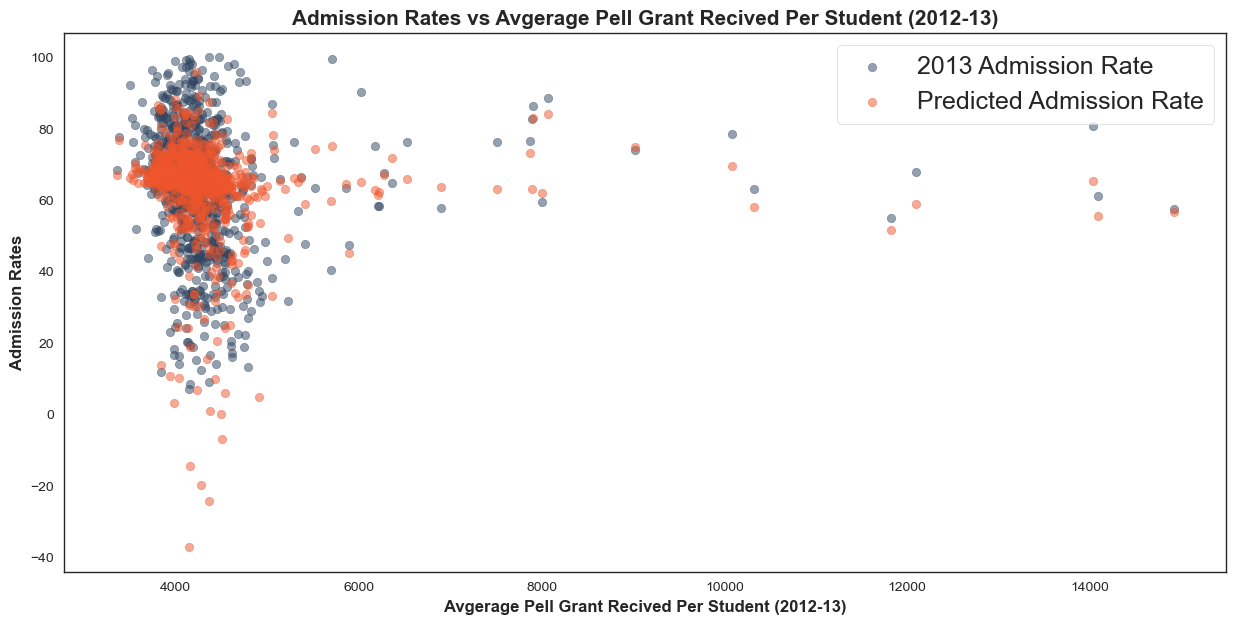

In [111]:
# Get predicted values and confidence intervals
pred_values = results.predict(X_sm)
#ci_low, ci_upp = results.conf_int(alpha=0.05)

# Plot data points and regression line
plt.scatter(model_2_df['avg_pell_grant_per_student'], model_2_df['admssn_rate'],
            color='#2f4560', alpha=0.5, label='2013 Admission Rate')
plt.scatter(model_2_df['avg_pell_grant_per_student'], pred_values, color='#ef552c', alpha=0.5, label='Predicted Admission Rate')

# Plot confidence intervals
#plt.fill_between(model_2_df['avg_pell_grant_per_student'], ci_low, ci_upp, color='green', alpha=0.2)

# Set labels and title
plt.xlabel('Avgerage Pell Grant Recived Per Student (2012-13)', fontweight='bold')
plt.ylabel('Admission Rates', fontweight='bold')
plt.title('Admission Rates vs Avgerage Pell Grant Recived Per Student (2012-13)', fontweight='bold', fontsize=15)

# Add legend
plt.legend(prop={'size': 18})

plt.show()

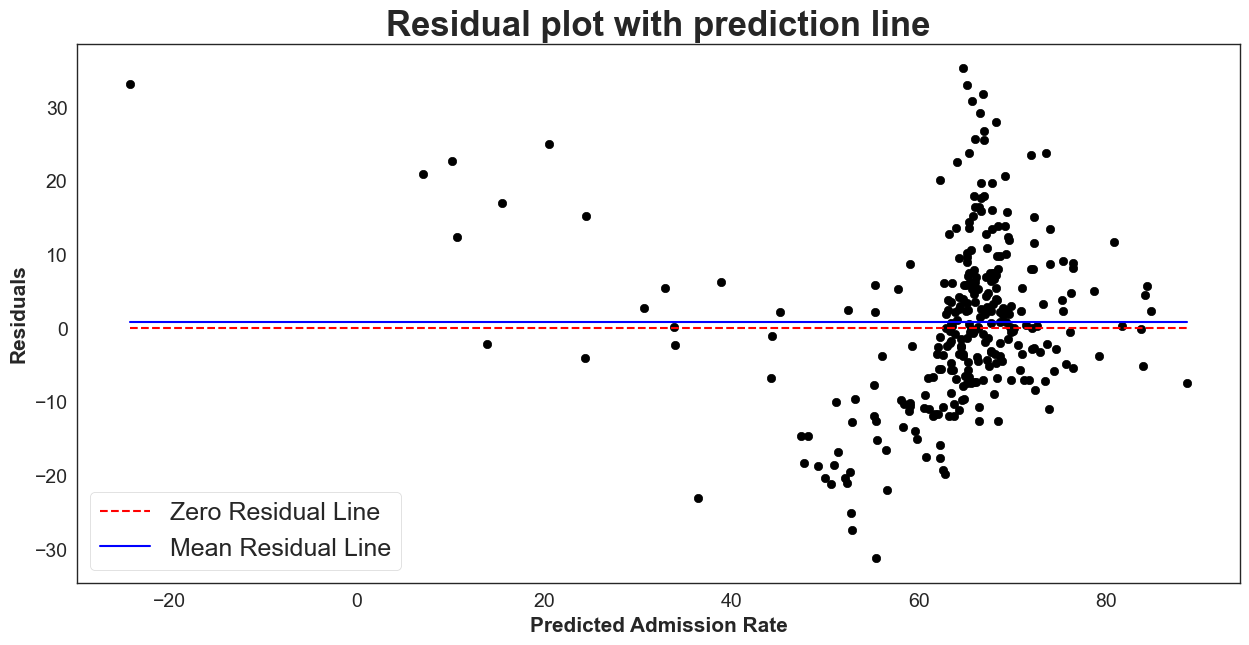

In [112]:
# Generate residual plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='black')
plt.plot([y_pred.min(), y_pred.max()], [0, 0], linestyle='--', color='red', label='Zero Residual Line')
plt.plot([y_pred.min(), y_pred.max()], [residuals.mean(), residuals.mean()], linestyle='-', color='blue', label='Mean Residual Line')

# Plot Formatting
plt.xlabel('Predicted Admission Rate', fontweight='bold', fontsize=15)
plt.ylabel('Residuals', fontweight='bold', fontsize=15)
plt.title('Residual plot with prediction line', fontweight='bold', fontsize=25)
plt.xticks(fontsize=14) # set the font size of the x axis tick marks
plt.yticks(fontsize=14) # set the font size of the y axis tick marks
plt.legend(prop={'size': 18}) # Add a legend
plt.show()